<a href="https://colab.research.google.com/github/sevginurbilgin/EDA/blob/main/FeatureExtraction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Extraction

In [ ]:
!pip install heartpy
!pip install neurokit2
!pip install h5py
!pip install shap
!pip install mrmr_selection
import numpy as np
import os
import scipy.stats
import heartpy as hp
import pandas as pd
import matplotlib.pyplot as plt
from natsort import natsorted
import neurokit2 as nk
import pickle
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, accuracy_score, f1_score, auc
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
import xgboost
import shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.9 MB/s eta 0:00:00


In [ ]:
from mrmr import mrmr_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
main_path='/content/drive/MyDrive/8Haziran2023_veriler/StroopTest/'
output_path_graphs = main_path + 'Analiz/GRAPHICS/'
output_path_features = main_path + 'Analiz/FEATURES/'

In [ ]:
with open(main_path+'Pickled_Data/'+'BVP_baseline.pkl', 'rb') as file:
    BVP_baseline = pickle.load(file)
with open(main_path+'Pickled_Data/'+'EDA_baseline.pkl', 'rb') as file:
    EDA_baseline = pickle.load(file)
with open(main_path+'Pickled_Data/'+'ST_baseline.pkl', 'rb') as file:
    ST_baseline = pickle.load(file)

with open(main_path+'Pickled_Data/'+'BVP_stroop.pkl', 'rb') as file:
    BVP_stroop = pickle.load(file)
with open(main_path+'Pickled_Data/'+'EDA_stroop.pkl', 'rb') as file:
    EDA_stroop = pickle.load(file)
with open(main_path+'Pickled_Data/'+'ST_stroop.pkl', 'rb') as file:
    ST_stroop = pickle.load(file)

with open(main_path+'Pickled_Data/'+'BVP_ns.pkl', 'rb') as file:
    BVP_ns = pickle.load(file)
with open(main_path+'Pickled_Data/'+'EDA_ns.pkl', 'rb') as file:
    EDA_ns = pickle.load(file)
with open(main_path+'Pickled_Data/'+'ST_ns.pkl', 'rb') as file:
    ST_ns = pickle.load(file)


In [ ]:
# deneme

bvp=BVP_baseline[0][200:300]
eda=EDA_baseline[0][200:300]
st=ST_baseline[0][200:300]

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

axs[0].plot(bvp)
axs[0].set_title('BVP')
axs[1].plot(eda)
axs[1].set_title('EDA')
axs[2].plot(st)
axs[2].set_title('ST')

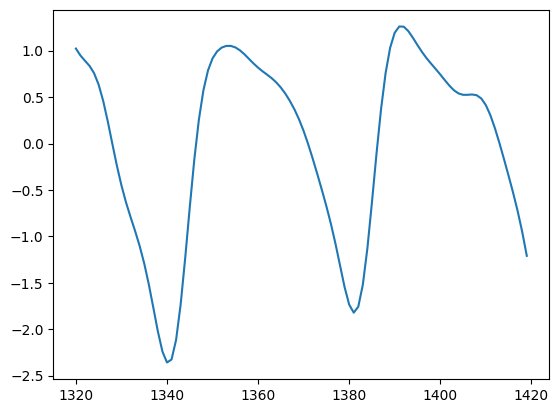

In [ ]:
normalized_BVP = (bvp - np.mean(bvp)) / np.std(bvp)

plt.plot(normalized_BVP)

In [ ]:
def extract_features_st(ST):
    ST_mean =  np.mean(ST)
    ST_mean = pd.DataFrame([ST_mean])

    ST_median =  np.median(ST)
    ST_median = pd.DataFrame([ST_median])

    ST_std = np.std(ST)
    ST_std = pd.DataFrame([ST_std])

    ST_min = np.min(ST)
    ST_min = pd.DataFrame([ST_min])


    ST_max = np.max(ST)
    ST_max = pd.DataFrame([ST_max])

    ST_skew = scipy.stats.skew(ST)
    ST_skew = pd.DataFrame([ST_skew])


    ST_kurt = scipy.stats.kurtosis(ST)
    ST_kurt = pd.DataFrame([ST_kurt])


    ST_quantile05 = np.quantile(ST,0.05)
    ST_quantile05 = pd.DataFrame([ST_quantile05])


    ST_quantile25 = np.quantile(ST,0.25)
    ST_quantile25 = pd.DataFrame([ST_quantile25])


    ST_quantile75 = np.quantile(ST,0.75)
    ST_quantile75 = pd.DataFrame([ST_quantile75])


    ST_quantile95 = np.quantile(ST,0.95)
    ST_quantile95 = pd.DataFrame([ST_quantile95])


    ST_var = np.var(ST)
    ST_var = pd.DataFrame([ST_var])


    ST_range = scipy.stats.iqr(ST,rng = (0,100))
    ST_range= pd.DataFrame([ST_range])


    ST_max_min = np.max(ST)/np.min(ST)
    ST_max_min = pd.DataFrame([ST_max_min])


    ST_iqr = scipy.stats.iqr(ST,rng = (25,75))
    ST_iqr= pd.DataFrame([ST_iqr])


    ST_coeffvar = scipy.stats.variation(ST)
    ST_coeffvar= pd.DataFrame([ST_coeffvar])

    st_first_absolute_difference = np.mean(np.abs(np.diff(ST)))
    ST_first_abs_diff=st_first_absolute_difference
    ST_first_abs_diff=pd.DataFrame([ST_first_abs_diff])

    st_second_absolute_difference = np.mean(np.abs(np.diff(np.diff(ST))))
    ST_second_abs_diff=st_second_absolute_difference
    ST_second_abs_diff=pd.DataFrame([ST_second_abs_diff])

    normalized_ST = (ST - np.mean(ST)) / np.std(ST)

    st_first_absolute_difference_normalized = np.mean(np.abs(np.diff(normalized_ST)))
    ST_first_abs_diff_norm=st_first_absolute_difference_normalized
    ST_first_abs_diff_norm=pd.DataFrame([ST_first_abs_diff_norm])

    st_second_absolute_difference_normalized = np.mean(np.abs(np.diff(np.diff(normalized_ST))))
    ST_second_abs_diff_norm=st_second_absolute_difference_normalized
    ST_second_abs_diff_norm=pd.DataFrame([ST_second_abs_diff_norm])


    Features = [
    ST_mean ,
    ST_median ,
    ST_std ,
    ST_min ,
    ST_max ,
    ST_skew ,
    ST_kurt ,
    ST_quantile05 ,
    ST_quantile25 ,
    ST_quantile75 ,
    ST_quantile95 ,
    ST_var ,
    ST_range ,
    ST_max_min ,
    ST_iqr ,
    ST_coeffvar ,
    ST_first_abs_diff ,
    ST_second_abs_diff ,
    ST_first_abs_diff_norm ,
    ST_second_abs_diff_norm
    ]
    Features_ = pd.concat(Features,axis = 1)


    Features_.columns = [
    "ST_mean" ,
    "ST_median" ,
    "ST_std" ,
    "ST_min" ,
    "ST_max" ,
    "ST_skew" ,
    "ST_kurt" ,
    "ST_quantile05" ,
    "ST_quantile25" ,
    "ST_quantile75" ,
    "ST_quantile95" ,
    "ST_var" ,
    "ST_range" ,
    "ST_max_min" ,
    "ST_iqr" ,
    "ST_coeffvar" ,
    "ST_first_abs_diff" ,
    "ST_second_abs_diff",
    "ST_first_abs_diff_norm" ,
    "ST_second_abs_diff_norm" ]

    return Features_


In [ ]:
from scipy.ndimage import label
def extract_features_eda(EDA_Signal):
    # İlgili sütunları çıkartalım (örneğin 'Column_B' ve 'Column_C')
    #columns_to_drop = ['Label', 'Participant_Id']
    #EDA = EDA_Signal.drop(columns=columns_to_drop, axis=1)
    EDA =EDA_Signal
    _sampling_rate=4
    EDA = nk.eda_clean(EDA, sampling_rate=_sampling_rate)
    gsr_scr_scl = nk.eda_phasic(EDA, sampling_rate = _sampling_rate)
    eda_phasic = gsr_scr_scl["EDA_Phasic"].values
    eda_tonic = gsr_scr_scl["EDA_Tonic"].values
    SCR=eda_phasic
    SCL=eda_tonic

    eda_mean = np.mean(EDA)
    EDA_mean=eda_mean
    scr_mean = np.mean(SCR)
    SCR_mean=scr_mean
    scl_mean = np.mean(SCL)
    SCL_mean=scl_mean
    EDA_mean = pd.DataFrame([EDA_mean])
    SCL_mean = pd.DataFrame([SCL_mean])
    SCR_mean = pd.DataFrame([SCR_mean])


    eda_median = np.median(EDA)
    EDA_median=eda_median
    scr_median = np.median(SCR)
    SCR_median=scr_median
    scl_median = np.median(SCL)
    SCL_median=scl_median
    EDA_median = pd.DataFrame([EDA_median])
    SCR_median = pd.DataFrame([SCR_median])
    SCL_median = pd.DataFrame([SCL_median])



    eda_std = np.std(EDA)
    EDA_std=eda_std
    scr_std = np.std(SCR)
    SCR_std=scr_std
    scl_std = np.std(SCL)
    SCL_std=scl_std
    EDA_std = pd.DataFrame([EDA_std])
    SCR_std = pd.DataFrame([SCR_std])
    SCL_std = pd.DataFrame([SCL_std])


    eda_min = np.min(EDA)
    EDA_min=eda_min
    scr_min = np.min(SCR)
    SCR_min=scr_min
    scl_min = np.min(SCL)
    SCL_min=scl_min
    EDA_min = pd.DataFrame([EDA_min])
    SCR_min = pd.DataFrame([SCR_min])
    SCL_min = pd.DataFrame([SCL_min])



    eda_max = np.max(EDA)
    EDA_max=eda_max
    scr_max = np.max(SCR)
    SCR_max=scr_max
    scl_max = np.max(SCL)
    SCL_max=scl_max
    EDA_max = pd.DataFrame([EDA_max])
    SCR_max = pd.DataFrame([SCR_max])
    SCL_max = pd.DataFrame([SCL_max])


    eda_skew = scipy.stats.skew(EDA)
    EDA_skew=eda_skew
    scr_skew = scipy.stats.skew(SCR)
    SCR_skew=scr_skew
    scl_skew = scipy.stats.skew(SCL)
    SCL_skew=scl_skew
    EDA_skew = pd.DataFrame([EDA_skew])
    SCR_skew = pd.DataFrame([SCR_skew])
    SCL_skew = pd.DataFrame([SCL_skew])


    eda_kurt = scipy.stats.kurtosis(EDA)
    EDA_kurt=eda_kurt
    scr_kurt = scipy.stats.kurtosis(SCR)
    SCR_kurt=scr_kurt
    scl_kurt = scipy.stats.kurtosis(SCL)
    SCL_kurt=scl_kurt
    EDA_kurt = pd.DataFrame([EDA_kurt])
    SCR_kurt = pd.DataFrame([SCR_kurt])
    SCL_kurt = pd.DataFrame([SCL_kurt])



    eda_quantile05 = np.quantile(EDA,0.05)
    EDA_quantile05=eda_quantile05
    scr_quantile05 = np.quantile(SCR,0.05)
    SCR_quantile05=scr_quantile05
    scl_quantile05 = np.quantile(SCL,0.05)
    SCL_quantile05=scl_quantile05
    EDA_quantile05 = pd.DataFrame([EDA_quantile05])
    SCR_quantile05 = pd.DataFrame([SCR_quantile05])
    SCL_quantile05 = pd.DataFrame([SCL_quantile05])



    eda_quantile25 = np.quantile(EDA,0.25)
    EDA_quantile25=eda_quantile25
    scr_quantile25 = np.quantile(SCR,0.25)
    SCR_quantile25=scr_quantile25
    scl_quantile25 = np.quantile(SCL,0.25)
    SCL_quantile25=scl_quantile25
    EDA_quantile25 = pd.DataFrame([EDA_quantile25])
    SCR_quantile25 = pd.DataFrame([SCR_quantile25])
    SCL_quantile25 = pd.DataFrame([SCL_quantile25])



    eda_quantile75 = np.quantile(EDA,0.75)
    EDA_quantile75=eda_quantile75
    scr_quantile75 = np.quantile(SCR,0.75)
    SCR_quantile75=scr_quantile75
    scl_quantile75 = np.quantile(SCL,0.75)
    SCL_quantile75=scl_quantile75
    EDA_quantile75 = pd.DataFrame([EDA_quantile75])
    SCR_quantile75 = pd.DataFrame([SCR_quantile75])
    SCL_quantile75 = pd.DataFrame([SCL_quantile75])



    eda_quantile95 = np.quantile(EDA,0.95)
    EDA_quantile95=eda_quantile95
    scr_quantile95 = np.quantile(SCR,0.95)
    SCR_quantile95=scr_quantile95
    scl_quantile95 = np.quantile(SCL,0.95)
    SCL_quantile95=scl_quantile95
    EDA_quantile95 = pd.DataFrame([EDA_quantile95])
    SCR_quantile95 = pd.DataFrame([SCR_quantile95])
    SCL_quantile95 = pd.DataFrame([SCL_quantile95])


    eda_var = np.var(EDA)
    EDA_var=eda_var
    scr_var = np.var(SCR)
    SCR_var=scr_var
    scl_var = np.var(SCL)
    SCL_var=scl_var
    EDA_var = pd.DataFrame([EDA_var])
    SCR_var = pd.DataFrame([SCR_var])
    SCL_var = pd.DataFrame([SCL_var])


    eda_range = scipy.stats.iqr(EDA,rng = (0,100))
    EDA_range=eda_range
    scr_range = scipy.stats.iqr(SCR,rng = (0,100))
    SCR_range=scr_range
    scl_range = scipy.stats.iqr(SCL,rng = (0,100))
    SCL_range=scl_range
    EDA_range= pd.DataFrame([EDA_range])
    SCR_range= pd.DataFrame([SCR_range])
    SCL_range= pd.DataFrame([SCL_range])


    eda_max_min = np.max(EDA)/np.min(EDA)
    EDA_max_min=eda_max_min
    scr_max_min = np.max(SCR)/np.min(SCR)
    SCR_max_min=scr_max_min
    scl_max_min = np.max(SCL)/np.min(SCL)
    SCL_max_min=scl_max_min
    EDA_max_min = pd.DataFrame([EDA_max_min])
    SCR_max_min = pd.DataFrame([SCR_max_min])
    SCL_max_min = pd.DataFrame([SCL_max_min])


    eda_iqr = scipy.stats.iqr(EDA,rng = (25,75))
    EDA_iqr=eda_iqr
    scr_iqr = scipy.stats.iqr(SCR,rng = (25,75))
    SCR_iqr=scr_iqr
    scl_iqr = scipy.stats.iqr(SCL,rng = (25,75))
    SCL_iqr=scl_iqr
    EDA_iqr= pd.DataFrame([EDA_iqr])
    SCR_iqr= pd.DataFrame([SCR_iqr])
    SCL_iqr= pd.DataFrame([SCL_iqr])



    eda_coeffvar = scipy.stats.variation(EDA)
    EDA_coeffvar=eda_coeffvar
    scr_coeffvar = scipy.stats.variation(SCR)
    SCR_coeffvar=scr_coeffvar
    scl_coeffvar = scipy.stats.variation(SCL)
    SCL_coeffvar=scl_coeffvar
    EDA_coeffvar= pd.DataFrame([EDA_coeffvar])
    SCR_coeffvar= pd.DataFrame([SCR_coeffvar])
    SCL_coeffvar= pd.DataFrame([SCL_coeffvar])



    eda_first_absolute_difference = np.mean(np.abs(np.diff(EDA)))
    EDA_first_abs_diff=eda_first_absolute_difference
    scr_first_absolute_difference = np.mean(np.abs(np.diff(SCR)))
    SCR_first_abs_diff=scr_first_absolute_difference
    scl_first_absolute_difference = np.mean(np.abs(np.diff(SCL)))
    SCL_first_abs_diff=scl_first_absolute_difference

    EDA_first_abs_diff=pd.DataFrame([EDA_first_abs_diff])
    SCR_first_abs_diff=pd.DataFrame([SCR_first_abs_diff])
    SCL_first_abs_diff=pd.DataFrame([SCL_first_abs_diff])

    eda_second_absolute_difference = np.mean(np.abs(np.diff(np.diff(EDA))))
    EDA_second_abs_diff=eda_second_absolute_difference
    scr_second_absolute_difference = np.mean(np.abs(np.diff(np.diff(SCR))))
    SCR_second_abs_diff=scr_second_absolute_difference
    scl_second_absolute_difference = np.mean(np.abs(np.diff(np.diff(SCL))))
    SCL_second_abs_diff=scl_second_absolute_difference

    EDA_second_abs_diff=pd.DataFrame([EDA_second_abs_diff])
    SCR_second_abs_diff=pd.DataFrame([SCR_second_abs_diff])
    SCL_second_abs_diff=pd.DataFrame([SCL_second_abs_diff])

    normalized_EDA = (EDA - eda_mean) / eda_std
    normalized_SCR = (SCR - scr_mean) / scr_std
    normalized_SCL = (SCL - scl_mean) / scl_std

    eda_first_absolute_difference_normalized = np.mean(np.abs(np.diff(normalized_EDA)))
    EDA_first_abs_diff_norm=eda_first_absolute_difference_normalized
    eda_second_absolute_difference_normalized = np.mean(np.abs(np.diff(np.diff(normalized_EDA))))
    EDA_second_abs_diff_norm=eda_second_absolute_difference_normalized

    scr_first_absolute_difference_normalized = np.mean(np.abs(np.diff(normalized_SCR)))
    SCR_first_abs_diff_norm=scr_first_absolute_difference_normalized
    scr_second_absolute_difference_normalized = np.mean(np.abs(np.diff(np.diff(normalized_SCR))))
    SCR_second_abs_diff_norm=scr_second_absolute_difference_normalized

    scl_first_absolute_difference_normalized = np.mean(np.abs(np.diff(normalized_SCL)))
    SCL_first_abs_diff_norm=scl_first_absolute_difference_normalized
    scl_second_absolute_difference_normalized = np.mean(np.abs(np.diff(np.diff(normalized_SCL))))
    SCL_second_abs_diff_norm=scl_second_absolute_difference_normalized

    EDA_first_abs_diff_norm=pd.DataFrame([EDA_first_abs_diff_norm])
    SCR_first_abs_diff_norm=pd.DataFrame([SCR_first_abs_diff_norm])
    SCL_first_abs_diff_norm=pd.DataFrame([SCL_first_abs_diff_norm])

    EDA_second_abs_diff_norm=pd.DataFrame([EDA_second_abs_diff_norm])
    SCR_second_abs_diff_norm=pd.DataFrame([SCR_second_abs_diff_norm])
    SCL_second_abs_diff_norm=pd.DataFrame([SCL_second_abs_diff_norm])

    # Get phasic component
    eda = nk.eda_phasic(EDA, sampling_rate=_sampling_rate)
    # Find peaks
    _, kim2004     = nk.eda_peaks(SCR, sampling_rate=_sampling_rate, method="kim2004")
    _, neurokit    = nk.eda_peaks(SCR, sampling_rate=_sampling_rate, method="neurokit")
    #_, nabian2018  = 5 #nk.eda_peaks(SCR, sampling_rate=_sampling_rate, method="nabian2018")
    average_peaks = round(( len(kim2004["SCR_Peaks"]) + len(neurokit["SCR_Peaks"])) / 2)
    SCR_Peaks = average_peaks
    SCR_Peaks = pd.DataFrame([SCR_Peaks])

 #   Label= 5#EDA['Label']
 #   Participant_Id= 2#EDA['Participant_Id']


    Features = [
    EDA_mean ,
    SCR_mean ,
    SCL_mean,
    EDA_median ,
    SCR_median ,
    SCL_median ,
    EDA_std ,
    SCR_std,
    SCL_std,
    EDA_min ,
    SCR_min ,
    SCL_min ,
    EDA_max ,
    SCR_max ,
    SCL_max ,
    EDA_skew ,
    SCR_skew ,
    SCL_skew,
    EDA_kurt ,
    SCR_kurt,
    SCL_kurt,
    EDA_quantile05 ,
    SCR_quantile05,
    SCL_quantile05,
    EDA_quantile25 ,
    SCR_quantile25,
    SCL_quantile25,
    EDA_quantile75 ,
    SCR_quantile75,
    SCL_quantile75,
    EDA_quantile95 ,
    SCR_quantile95,
    SCL_quantile95,
    EDA_var ,
    SCR_var,
    SCL_var,
    EDA_range ,
    SCR_range,
    SCL_range,
    EDA_max_min ,
    SCR_max_min,
    SCL_max_min,
    EDA_iqr ,
    SCR_iqr,
    SCL_iqr,
    EDA_coeffvar ,
    SCR_coeffvar,
    SCL_coeffvar,
    EDA_first_abs_diff,
    SCR_first_abs_diff,
    SCL_first_abs_diff,
    EDA_second_abs_diff,
    SCL_second_abs_diff,
    SCR_second_abs_diff,
    EDA_first_abs_diff_norm,
    SCR_first_abs_diff_norm,
    SCL_first_abs_diff_norm,
    EDA_second_abs_diff_norm,
    SCR_second_abs_diff_norm,
    SCL_second_abs_diff_norm,
    SCR_Peaks
#    Label,
#    Participant_Id
    ]
    Features_ = pd.concat(Features,axis = 1)


    Features_.columns = [
    "EDA_mean",
    "SCR_mean",
    "SCL_mean",
    "EDA_median",
    "SCR_median",
    "SCL_median",
    "EDA_std",
    "SCR_std",
    "SCL_std",
    "EDA_min",
    "SCR_min",
    "SCL_min",
    "EDA_max",
    "SCR_max",
    "SCL_max",
    "EDA_skew",
    "SCR_skew",
    "SCL_skew",
    "EDA_kurt",
    "SCR_kurt",
    "SCL_kurt",
    "EDA_quantile05",
    "SCR_quantile05",
    "SCL_quantile05",
    "EDA_quantile25",
    "SCR_quantile25",
    "SCL_quantile25",
    "EDA_quantile75",
    "SCR_quantile75",
    "SCL_quantile75",
    "EDA_quantile95",
    "SCR_quantile95",
    "SCL_quantile95",
    "EDA_var",
    "SCR_var",
    "SCL_var",
    "EDA_range",
    "SCR_range",
    "SCL_range",
    "EDA_max_min",
    "SCR_max_min",
    "SCL_max_min",
    "EDA_iqr",
    "SCR_iqr",
    "SCL_iqr",
    "EDA_coeffvar",
    "SCR_coeffvar",
    "SCL_coeffvar",
    "EDA_first_abs_diff",
    "SCR_first_abs_diff",
    "SCL_first_abs_diff",
    "EDA_second_abs_diff",
    "SCL_second_abs_diff",
    "SCR_second_abs_diff",
    "EDA_first_abs_diff_norm",
    "SCR_first_abs_diff_norm",
    "SCL_first_abs_diff_norm",
    "EDA_second_abs_diff_norm",
    "SCR_second_abs_diff_norm",
    "SCL_second_abs_diff_norm",
    "SCR_Peaks"
 #   "Label",
 #   "Participant_Id"
    ]
    return Features_

In [ ]:
from cmath import nan

def extract_features_bvp(BVP):
  BVP_mean =  np.mean(BVP)
  BVP_mean = pd.DataFrame([BVP_mean])

  BVP_median = np.median(BVP)
  BVP_median = pd.DataFrame([BVP_median])

  BVP_std = np.std(BVP)
  BVP_std = pd.DataFrame([BVP_std])

  BVP_min = np.min(BVP)
  BVP_min = pd.DataFrame([BVP_min])

  BVP_max = np.max(BVP)
  BVP_max = pd.DataFrame([BVP_max])

  BVP_skew = scipy.stats.skew(BVP)
  BVP_skew = pd.DataFrame([BVP_skew])

  BVP_kurt = scipy.stats.kurtosis(BVP)
  BVP_kurt = pd.DataFrame([BVP_kurt])

  BVP_quantile05 = np.quantile(BVP,0.05)
  BVP_quantile05 = pd.DataFrame([BVP_quantile05])

  BVP_quantile25 = np.quantile(BVP,0.25)
  BVP_quantile25 = pd.DataFrame([BVP_quantile25])

  BVP_quantile75 = np.quantile(BVP,0.75)
  BVP_quantile75 = pd.DataFrame([BVP_quantile75])

  BVP_quantile95 = np.quantile(BVP,0.95)
  BVP_quantile95 = pd.DataFrame([BVP_quantile95])

  BVP_var = np.var(BVP)
  BVP_var = pd.DataFrame([BVP_var])

  BVP_range = scipy.stats.iqr(BVP,rng = (0,100))
  BVP_range= pd.DataFrame([BVP_range])

  BVP_max_min = np.max(BVP)/np.min(BVP)
  BVP_max_min = pd.DataFrame([BVP_max_min])

  BVP_iqr = scipy.stats.iqr(BVP,rng = (25,75))
  BVP_iqr= pd.DataFrame([BVP_iqr])

  BVP_coeffvar = scipy.stats.variation(BVP)
  BVP_coeffvar= pd.DataFrame([BVP_coeffvar])


  try:
    wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
    bvp_bpm = m['bpm']
  except:
    bvp_bpm=float("NaN")
  BVP_bpm = bvp_bpm
  BVP_bpm = pd.DataFrame([BVP_bpm])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_ibi = m['ibi']
  except:
    bvp_ibi=float("NaN")
  BVP_ibi = bvp_ibi
  BVP_ibi = pd.DataFrame([BVP_ibi])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_sdnn = m['sdnn']
  except:
      bvp_sdnn=float("NaN")
  BVP_sdnn = bvp_sdnn
  BVP_sdnn = pd.DataFrame([BVP_sdnn])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_sdsd = m['sdsd']
  except:
      bvp_sdsd=float("NaN")
  BVP_sdsd = bvp_sdsd
  BVP_sdsd = pd.DataFrame([BVP_sdsd])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_rmssd = m['rmssd']
  except:
      bvp_rmssd=float("NaN")
  BVP_rmssd = bvp_rmssd
  BVP_rmssd = pd.DataFrame([BVP_rmssd])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_pnn20 = m['pnn20']
  except:
      bvp_pnn20=float("NaN")
  BVP_pnn20 = bvp_pnn20
  BVP_pnn20 = pd.DataFrame([BVP_pnn20])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_pnn50 = m['pnn50']
  except:
      bvp_pnn50=float("NaN")
  BVP_pnn50 = bvp_pnn50
  BVP_pnn50 = pd.DataFrame([BVP_pnn50])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_hr_mad = m['hr_mad']
  except:
      bvp_hr_mad=float("NaN")
  BVP_hr_mad = bvp_hr_mad
  BVP_hr_mad= pd.DataFrame([BVP_hr_mad])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_sd1 = m['sd1']
  except:
      bvp_sd1=float("NaN")
  BVP_sd1 = bvp_sd1
  BVP_sd1 = pd.DataFrame([BVP_sd1])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_sd2 = m['sd2']
  except:
      bvp_sd2=float("NaN")
  BVP_sd2 = bvp_sd2
  BVP_sd2 = pd.DataFrame([BVP_sd2])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_s = m['s']
  except:
      bvp_s=float("NaN")
  BVP_s = bvp_s
  BVP_s = pd.DataFrame([BVP_s])


  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_sd1_sd2 = m['sd1/sd2']
  except:
      bvp_sd1_sd2=float("NaN")
  BVP_sd1_sd2 = bvp_sd1_sd2
  BVP_sd1_sd2 = pd.DataFrame([BVP_sd1_sd2])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_br = m['breathingrate']
  except:
      bvp_br=float("NaN")
  BVP_br = bvp_br
  BVP_br = pd.DataFrame([BVP_br])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_vlf = m['vlf']
  except:
      bvp_vlf=float("NaN")
  BVP_vlf = bvp_vlf
  BVP_vlf = pd.DataFrame([BVP_vlf])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_lf = m['lf']
  except:
      bvp_lf=float("NaN")
  BVP_lf = bvp_lf
  BVP_lf = pd.DataFrame([BVP_lf])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_hf = m['hf']
  except:
      bvp_hf=float("NaN")
  BVP_hf = bvp_hf
  BVP_hf = pd.DataFrame([BVP_hf])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_lf_hf = m['lf/hf']
  except:
      bvp_lf_hf=float("NaN")
  BVP_lf_hf = bvp_lf_hf
  BVP_lf_hf = pd.DataFrame([BVP_lf_hf])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_p_total = m['p_total']
  except:
      bvp_p_total=float("NaN")
  BVP_p_total = bvp_p_total
  BVP_p_total = pd.DataFrame([BVP_p_total])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_vlf_perc = m['vlf_perc']
  except:
      bvp_vlf_perc=float("NaN")
  BVP_vlf_perc = bvp_vlf_perc
  BVP_vlf_perc = pd.DataFrame([BVP_vlf_perc])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_lf_perc = m['lf_perc']
  except:
      bvp_lf_perc=float("NaN")
  BVP_lf_perc = bvp_lf_perc
  BVP_lf_perc = pd.DataFrame([BVP_lf_perc])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_hf_perc = m['hf_perc']
  except:
      bvp_hf_perc=float("NaN")
  BVP_hf_perc = bvp_hf_perc
  BVP_hf_perc = pd.DataFrame([BVP_hf_perc])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_lf_nu = m['lf_nu']
  except:
      bvp_lf_nu=float("NaN")
  BVP_lf_nu = bvp_lf_nu
  BVP_lf_nu = pd.DataFrame([BVP_lf_nu])

  try:
      wd, m = hp.process(BVP, 64, windowsize=0.75, report_time=True, calc_freq=True, freq_method='welch', welch_wsize=240, freq_square=False, interp_clipping=False, clipping_scale=False, interp_threshold=1020, hampel_correct=False, bpmmin=40, bpmmax=180, reject_segmentwise=False, high_precision=False, high_precision_fs=1000.0, breathing_method='welch', clean_rr=False, clean_rr_method='quotient-filter', measures=None, working_data=None)
      bvp_hf_nu = m['hf_nu']
  except:
      bvp_hf_nu=float("NaN")
  BVP_hf_nu = bvp_hf_nu
  BVP_hf_nu = pd.DataFrame([BVP_hf_nu])

  bvp_first_absolute_difference = np.mean(np.abs(np.diff(BVP)))
  BVP_first_abs_diff=bvp_first_absolute_difference
  BVP_first_abs_diff=pd.DataFrame([BVP_first_abs_diff])

  bvp_second_absolute_difference = np.mean(np.abs(np.diff(np.diff(BVP))))
  BVP_second_abs_diff=bvp_second_absolute_difference
  BVP_second_abs_diff=pd.DataFrame([BVP_second_abs_diff])

  normalized_BVP = (BVP - np.mean(BVP)) / np.std(BVP) #Z-score normalization or standardization. It scales the data such that it has a mean of 0 and a standard deviation of 1. By doing so, it transforms the data into a standard normal distribution

  bvp_first_absolute_difference_normalized = np.mean(np.abs(np.diff(normalized_BVP)))
  BVP_first_abs_diff_norm=bvp_first_absolute_difference_normalized
  BVP_first_abs_diff_norm=pd.DataFrame([BVP_first_abs_diff_norm])

  bvp_second_absolute_difference_normalized = np.mean(np.abs(np.diff(np.diff(normalized_BVP))))
  BVP_second_abs_diff_norm=bvp_second_absolute_difference_normalized
  BVP_second_abs_diff_norm=pd.DataFrame([BVP_second_abs_diff_norm])

  Features = [
  BVP_mean ,
  BVP_median ,
  BVP_std ,
  BVP_min ,
  BVP_max ,
  BVP_skew ,
  BVP_kurt ,
  BVP_quantile05 ,
  BVP_quantile25 ,
  BVP_quantile75 ,
  BVP_quantile95 ,
  BVP_var ,
  BVP_range ,
  BVP_max_min ,
  BVP_iqr ,
  BVP_coeffvar ,
  BVP_bpm ,
  BVP_ibi ,
  BVP_sdnn ,
  BVP_sdsd ,
  BVP_rmssd ,
  BVP_pnn20 ,
  BVP_pnn50 ,
  BVP_hr_mad ,
  BVP_sd1 ,
  BVP_sd2 ,
  BVP_s ,
  BVP_sd1_sd2 ,
  BVP_br ,
  BVP_vlf ,
  BVP_lf ,
  BVP_hf ,
  BVP_lf_hf ,
  BVP_p_total ,
  BVP_vlf_perc ,
  BVP_lf_perc ,
  BVP_hf_perc ,
  BVP_lf_nu ,
  BVP_hf_nu,
  BVP_first_abs_diff,
  BVP_second_abs_diff,
  BVP_first_abs_diff_norm,
  BVP_second_abs_diff_norm
  ]

  Features_ = pd.concat(Features,axis = 1)

  Features_.columns = [
  "BVP_mean",
  "BVP_median",
  "BVP_std",
  "BVP_min",
  "BVP_max",
  "BVP_skew",
  "BVP_kurt",
  "BVP_quantile05",
  "BVP_quantile25",
  "BVP_quantile75",
  "BVP_quantile95",
  "BVP_var",
  "BVP_range",
  "BVP_max_min",
  "BVP_iqr",
  "BVP_coeffvar",
  "BVP_bpm",
  "BVP_ibi",
  "BVP_sdnn",
  "BVP_sdsd",
  "BVP_rmssd",
  "BVP_pnn20",
  "BVP_pnn50",
  "BVP_hr_mad",
  "BVP_sd1",
  "BVP_sd2",
  "BVP_s",
  "BVP_sd1_sd2",
  "BVP_br",
  "BVP_vlf",
  "BVP_lf",
  "BVP_hf",
  "BVP_lf_hf",
  "BVP_p_total",
  "BVP_vlf_perc",
  "BVP_lf_perc",
  "BVP_hf_perc",
  "BVP_lf_nu",
  "BVP_hf_nu",
  "BVP_first_abs_diff",
  "BVP_second_abs_diff",
  "BVP_first_abs_diff_norm",
  "BVP_second_abs_diff_norm"
  ]
  return Features_


In [ ]:
np.shape(EDA_baseline[1])

(240, 1)

In [ ]:
'''
import numpy as np
import neurokit2 as nk

interval_sec = 1 #1 snlik aralıklar
sampling_rate = 4
total_sample_count = len(EDA_baseline[0])
num_intervals = total_sample_count // sampling_rate * interval_sec
interval_signal = []
EDA_0=EDA_baseline[0]

for i in range(num_intervals):
    interval = EDA_0[i:i+10]
    interval_signal.append(interval)
vector = interval_signal

for i, interval in enumerate(vector):
    print(len(interval))
    gsr_scr_scl = nk.eda_phasic(interval, sampling_rate=4)
    eda_phasic = gsr_scr_scl["EDA_Phasic"].values
    eda_tonic = gsr_scr_scl["EDA_Tonic"].values
    SCR = eda_phasic
    SCL = eda_tonic
'''

'\nimport numpy as np\nimport neurokit2 as nk\n\ninterval_sec = 1 #1 snlik aralıklar\nsampling_rate = 4\ntotal_sample_count = len(EDA_baseline[0])\nnum_intervals = total_sample_count // sampling_rate * interval_sec\ninterval_signal = []\nEDA_0=EDA_baseline[0]\n\nfor i in range(num_intervals):\n    interval = EDA_0[i:i+10]\n    interval_signal.append(interval)\nvector = interval_signal\n\nfor i, interval in enumerate(vector):\n    print(len(interval))\n    gsr_scr_scl = nk.eda_phasic(interval, sampling_rate=4)\n    eda_phasic = gsr_scr_scl["EDA_Phasic"].values\n    eda_tonic = gsr_scr_scl["EDA_Tonic"].values\n    SCR = eda_phasic\n    SCL = eda_tonic\n'

In [ ]:
toplu_dfs = [EDA_baseline,EDA_stroop,EDA_ns]
for i in range(len(EDA_baseline)):
  EDA_baseline[i]['Label']=0
  EDA_stroop  [i]['Label']=1
  EDA_ns      [i]['Label']=2
  EDA_baseline[i]['Participant_Id']=i
  EDA_stroop  [i]['Participant_Id']=i
  EDA_ns      [i]['Participant_Id']=i
  EDA_baseline[i].columns = ['Value','Label','Participant_Id']
  EDA_stroop  [i].columns = ['Value','Label','Participant_Id']
  EDA_ns      [i].columns = ['Value','Label','Participant_Id']
np.shape(EDA_baseline)
EDA_baseline[0]

Value  Label  Participant_Id
72   0.447131      0               0
73   0.445850      0               0
74   0.447131      0               0
75   0.457380      0               0
76   0.457380      0               0
..        ...    ...             ...
307  0.461224      0               0
308  0.457380      0               0
309  0.459942      0               0
310  0.457380      0               0
311  0.458661      0               0

[240 rows x 3 columns]

In [ ]:
# Define the sampling frequency and desired slice duration (3 second)
sampling_frequency = 4  # Hz
slice_duration = 4  # seconds

# Calculate the number of samples per slice
samples_per_slice = sampling_frequency * slice_duration

# Create a list to store the slices for each toplu_df
slices_per_toplu_df = []

# Iterate through each toplu DataFrame (you may have a list of 3 toplu DataFrames)

for toplu_df in toplu_dfs:           # EDA_baseline,EDA_stroop,EDA_ns içerisinden sırayla seçim
    slices_per_participant = []

    for participant_data in toplu_df:  # Iterate through the DataFrames directly  participant indexler geliyor
        # Convert the participant_data DataFrame to a NumPy array
        participant_data = participant_data.values

        num_samples = participant_data.shape[0]
        num_slices = num_samples // samples_per_slice

        # Reshape the participant's data into slices
        slices = participant_data[:num_slices * samples_per_slice].reshape(num_slices, samples_per_slice, -1)

        # Replace any NaN values in the slices with the mean value of that slice (modify as needed)
        slices[np.isnan(slices)] = np.nanmean(slices)

        # Append the slices to the list
        slices_per_participant.append(slices)

    # Append the slices_per_participant to slices_per_toplu_df
    slices_per_toplu_df.append(slices_per_participant)
#print(slices_per_toplu_df[a][b][c])
# a = 0: Baseline 1: Stroop 2:NoStress
# b = Participant number 0 - 14
# c = Slice number
# slices_per_toplu_df will contain slices for each toplu_df, and slices_per_participant within each toplu_df.

In [ ]:
# İlgili sütunları çıkartalım (örneğin 'Column_B' ve 'Column_C')
columns_to_drop = ['Label', 'Participant_Id']
eda_signal = EDA_baseline[0].drop(columns=columns_to_drop, axis=1)
eda_signal['Value']

72     0.447131
73     0.445850
74     0.447131
75     0.457380
76     0.457380
         ...   
307    0.461224
308    0.457380
309    0.459942
310    0.457380
311    0.458661
Name: Value, Length: 240, dtype: float64

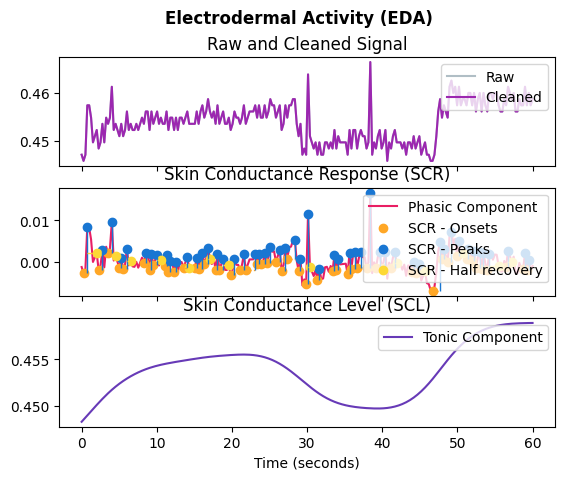

In [ ]:
eda_signal[np.isnan(eda_signal)] = np.mean(eda_signal['Value'])
eda_signal_ = np.squeeze(eda_signal)

  # Replace NaN values with zeros or any other appropriate value


signals, info = nk.eda_process(eda_signal_, sampling_rate=4)
signals
info
nk.eda_plot(signals, info)

In [ ]:
for user in np.arange(len(slices_per_participant)):
  user_epoched=slices_per_participant[user]
len(slices_per_participant)
np.shape(slices_per_participant[0][0][0])

(3,)

In [ ]:
len(slices_per_toplu_df)
Features_all_eda = pd.DataFrame()
EDA_baseline[0]['Value']

72     0.447131
73     0.445850
74     0.447131
75     0.457380
76     0.457380
         ...   
307    0.461224
308    0.457380
309    0.459942
310    0.457380
311    0.458661
Name: Value, Length: 240, dtype: float64

In [ ]:
slices_per_participant[1][2][4]

array([0.175511, 2.      , 1.      ])

22

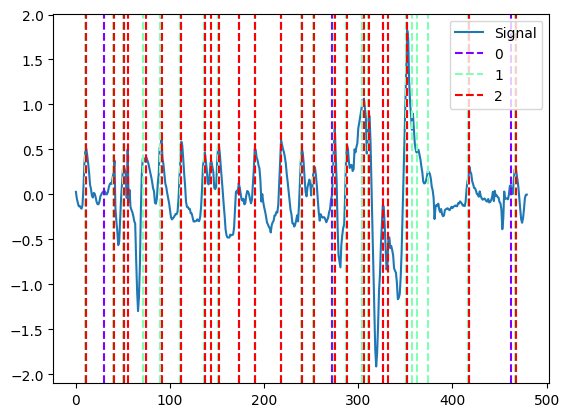

In [ ]:
_sampling_rate=4
# Get phasic component
eda_signal = EDA_stroop[4]['Value']#nk.eda_simulate(duration=30, scr_number=5, drift=0.1, noise=0, sampling_rate=100)

eda_cleaned = nk.eda_clean(eda_signal, sampling_rate=_sampling_rate)

eda = nk.eda_phasic(eda_cleaned, sampling_rate=_sampling_rate)

eda_phasic = eda["EDA_Phasic"].values

# Find peaks
_, kim2004 = nk.eda_peaks(eda_phasic, sampling_rate=_sampling_rate, method="kim2004")

_, neurokit = nk.eda_peaks(eda_phasic, sampling_rate=_sampling_rate, method="neurokit")

_, nabian2018 = nk.eda_peaks(eda_phasic, sampling_rate=_sampling_rate, method="nabian2018")

nk.events_plot([
  nabian2018["SCR_Peaks"],
     kim2004["SCR_Peaks"],
     neurokit["SCR_Peaks"]
  ], eda_phasic)
average_peaks = round((len(nabian2018["SCR_Peaks"]) + len(kim2004["SCR_Peaks"]) + len(neurokit["SCR_Peaks"])) / 3)
average_peaks

{'SCR_Onsets': array([nan]),
 'SCR_Peaks': array([236]),
 'SCR_Height': array([0.54020386])}

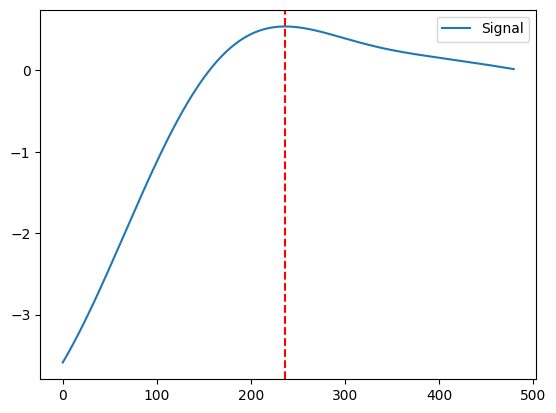

In [ ]:

# Get phasic component
#eda_signal = nk.eda_simulate(duration=30, scr_number=5, drift=0.1, noise=0)

eda_cleaned = nk.eda_clean(eda_signal)

eda = nk.eda_phasic(eda_cleaned)
eda_phasic = eda["EDA_Phasic"].values

# Find and fix peaks
info = nk.eda_findpeaks(eda_phasic)
info = nk.eda_fixpeaks(info)
nk.events_plot(info["SCR_Peaks"], eda_phasic)
info

In [ ]:
a = np.squeeze(slices_per_toplu_df[0][0][0])
slices_per_toplu_df[0][0][0]

array([[0.447131, 0.      , 0.      ],
       [0.44585 , 0.      , 0.      ],
       [0.447131, 0.      , 0.      ],
       [0.45738 , 0.      , 0.      ],
       [0.45738 , 0.      , 0.      ],
       [0.454818, 0.      , 0.      ],
       [0.449693, 0.      , 0.      ],
       [0.450974, 0.      , 0.      ],
       [0.452255, 0.      , 0.      ],
       [0.448412, 0.      , 0.      ],
       [0.449693, 0.      , 0.      ],
       [0.453537, 0.      , 0.      ],
       [0.449693, 0.      , 0.      ],
       [0.454818, 0.      , 0.      ],
       [0.453537, 0.      , 0.      ],
       [0.454818, 0.      , 0.      ]])

In [ ]:
a = np.squeeze(slices_per_toplu_df[2][10][0])
your_array_after_deletion = np.delete(slices_per_toplu_df[0][0][0], 1, axis=1)
your_array_after_deletion = np.delete(your_array_after_deletion, 1, axis=1)
Features_eda = (extract_features_eda(np.squeeze(your_array_after_deletion)))
Features_eda['SCR_Peaks']

0    2
Name: SCR_Peaks, dtype: int64

In [ ]:
Features_eda_all = pd.DataFrame()
# Iterate through participants and slices
for s in range(len(slices_per_toplu_df)): # baseline 0 stroop 1 ns 2
  for i in range(len(slices_per_toplu_df[s])): # kacıncı participant
      Features_eda_selected_participant = pd.DataFrame()
      for j in range(len(slices_per_toplu_df[s][i])): #kacıncı seans
          # Extract the EDA signal
          your_array_after_deletion = np.delete(slices_per_toplu_df[s][i][j], 1, axis=1)
          your_array_after_deletion = np.delete(your_array_after_deletion, 1, axis=1)
          eda_signal = (np.squeeze(your_array_after_deletion))

          # Check if eda_signal is not empty
          if len(eda_signal) == 0:
              print("EDA signal is empty for participant",s, i, "slice", j)
              continue  # Skip this iteration

          # Calculate the mean over the entire `eda_signal`
          mean_value = np.nanmean(eda_signal)  # Use np.nanmean to handle NaN values

          # Replace NaN values with the computed mean
          eda_signal[np.isnan(eda_signal)] = mean_value

          try:
              # Process the EDA signal
              signals, info = nk.eda_process(eda_signal, sampling_rate=4)
              #nk.eda_plot(signals, info)
              #plt.savefig(f'{output_path_features}/PNG/S{s}_{i+1}_{j}_{j+2 }Ogrenci.png')

              # Extract features from the processed signal
              Features_eda = extract_features_eda(eda_signal)
              Features_eda['Label'] = s
              Features_eda['Participant_Id'] = i

              # Create a DataFrame from the extracted features
              Features_eda_selected_participant = pd.concat([Features_eda_selected_participant, Features_eda], axis=0)
              Features_eda_all = pd.concat([Features_eda_selected_participant, Features_eda_all], axis=0)

              # Save the features to a CSV file
              #Features_eda.to_csv(f'{output_path_features}/CSV/S{s}_{i+1}_{j}_{j+2}Ogrenci.csv', index=False, header=True)
              #driveda yer olmadıgı için alt satırı kapattım şimdilik
              #Features_eda_selected_participant.to_csv(f'{output_path_features}/CSV/S{s}_{i+1}_Ogrenci.csv', index=False, header=True)

          except Exception as e:
              print("Error processing EDA signal for participant", s,"session", i, "slice", j)
              print(e)


Error processing EDA signal for participant 0 session 0 slice 1
zero-size array to reduction operation fmax which has no identity
Error processing EDA signal for participant 0 session 0 slice 2
zero-size array to reduction operation fmax which has no identity
Error processing EDA signal for participant 0 session 0 slice 3
zero-size array to reduction operation fmax which has no identity
Error processing EDA signal for participant 0 session 0 slice 7
zero-size array to reduction operation fmax which has no identity
Error processing EDA signal for participant 0 session 0 slice 11
zero-size array to reduction operation fmax which has no identity
Error processing EDA signal for participant 0 session 0 slice 13
("NeuroKit error: eda_peaks(): Peaks and onsets don't ", 'match, so cannot get amplitude safely. Check why using `find_peaks()`.')
Error processing EDA signal for participant 0 session 1 slice 2
zero-size array to reduction operation fmax which has no identity
Error processing EDA si

In [ ]:
Features_eda_all
Features_eda_all.to_csv(f'{output_path_features}/CSV/All_EDA_Features.csv', index=False, header=True)

In [ ]:
Features_eda_all

EDA_mean  SCR_mean  SCL_mean  EDA_median  SCR_median  SCL_median  \
0   0.432772 -0.000847  0.431730    0.432372   -0.001034    0.431794   
0   0.433012 -0.000167  0.431905    0.432372   -0.000362    0.431941   
0   0.433572  0.000457  0.431916    0.432372   -0.000009    0.431949   
0   0.435894  0.001573  0.433705    0.435574    0.001106    0.433760   
0   0.438616 -0.001008  0.439664    0.438136   -0.001382    0.439665   
..       ...       ...       ...         ...         ...         ...   
0   0.455218  0.000105  0.456643    0.454818   -0.000086    0.456568   
0   0.455378  0.001329  0.453586    0.454818    0.000911    0.453638   
0   0.451695  0.000543  0.449195    0.451615   -0.000188    0.449273   
0   0.455218  0.000105  0.456643    0.454818   -0.000086    0.456568   
0   0.451695  0.000543  0.449195    0.451615   -0.000188    0.449273   

     EDA_std   SCR_std   SCL_std   EDA_min  ...  SCR_second_abs_diff  \
0   0.002448  0.002261  0.000542  0.429168  ...             0.006039   
0   0.002309  0.002326  0.000354  0.430450  ...             0.005124   
0   0.003761  0.003746  0.000345  0.430450  ...             0.007689   
0   0.002196  0.002168  0.000301  0.433012  ...             0.005673   
0   0.002259  0.002212  0.000005  0.435574  ...             0.004759   
..       ...       ...       ...       ...  ...                  ...   
0   0.001678  0.001397  0.000531  0.452255  ...             0.003480   
0   0.001278  0.001256  0.000249  0.453537  ...             0.002747   
0   0.003537  0.003445  0.000622  0.445850  ...             0.005125   
0   0.001678  0.001397  0.000531  0.452255  ...             0.003480   
0   0.003537  0.003445  0.000622  0.445850  ...             0.005125   

    EDA_first_abs_diff_norm  SCR_first_abs_diff_norm  SCL_first_abs_diff_norm  \
0                  1.430234                 1.574791                 0.212379   
0                  1.257320                 1.263173                 0.211639   
0                  1.135246                 1.160028                 0.211834   
0                  1.400304                 1.426786                 0.211477   
0                  1.172009                 1.198858                 0.349590   
..                      ...                      ...                      ...   
0                  1.221781                 1.485668                 0.212701   
0                  1.269148                 1.295234                 0.211880   
0                  0.821062                 0.831858                 0.212040   
0                  1.221781                 1.485668                 0.212701   
0                  0.821062                 0.831858                 0.212040   

    EDA_second_abs_diff_norm  SCR_second_abs_diff_norm  \
0                   2.466768                  2.670642   
0                   2.218801                  2.203358   
0                   2.043436                  2.052284   
0                   2.583894                  2.616700   
0                   2.106333                  2.151465   
..                       ...                       ...   
0                   2.072639                  2.490230   
0                   2.147055                  2.187726   
0                   1.448968                  1.487558   
0                   2.072639                  2.490230   
0                   1.448968                  1.487558   

    SCL_second_abs_diff_norm  SCR_Peaks  Label  Participant_Id  
0                   0.010839          3      2              14  
0                   0.009283          2      2              14  
0                   0.009142          3      2              14  
0                   0.015623          3      2              14  
0                   0.115230          3      2              14  
..                       ...        ...    ...             ...  
0                   0.012822          4      0               0  
0                   0.018382          3      0               0  
0                  

nan

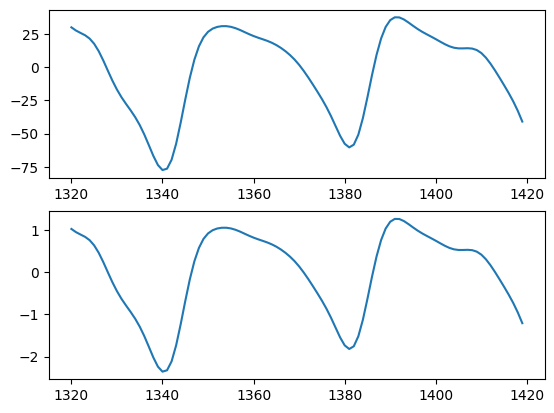

In [ ]:
#DENEME
normalized_BVP = (bvp - np.mean(bvp)) / np.std(bvp)

plt.figure(1)
plt.subplot(211)
plt.plot(bvp)
plt.subplot(212)
plt.plot(normalized_BVP)

np.mean(np.abs(np.diff(normalized_BVP)))

# Classification

In [ ]:
from sklearn.model_selection import train_test_split
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [ ]:
Features_eda_all

EDA_mean  SCR_mean  SCL_mean  EDA_median  SCR_median  SCL_median  \
0   0.432772 -0.000847  0.431730    0.432372   -0.001034    0.431794   
0   0.433012 -0.000167  0.431905    0.432372   -0.000362    0.431941   
0   0.433572  0.000457  0.431916    0.432372   -0.000009    0.431949   
0   0.435894  0.001573  0.433705    0.435574    0.001106    0.433760   
0   0.438616 -0.001008  0.439664    0.438136   -0.001382    0.439665   
..       ...       ...       ...         ...         ...         ...   
0   0.455218  0.000105  0.456643    0.454818   -0.000086    0.456568   
0   0.455378  0.001329  0.453586    0.454818    0.000911    0.453638   
0   0.451695  0.000543  0.449195    0.451615   -0.000188    0.449273   
0   0.455218  0.000105  0.456643    0.454818   -0.000086    0.456568   
0   0.451695  0.000543  0.449195    0.451615   -0.000188    0.449273   

     EDA_std   SCR_std   SCL_std   EDA_min  ...  SCR_second_abs_diff  \
0   0.002448  0.002261  0.000542  0.429168  ...             0.006039   
0   0.002309  0.002326  0.000354  0.430450  ...             0.005124   
0   0.003761  0.003746  0.000345  0.430450  ...             0.007689   
0   0.002196  0.002168  0.000301  0.433012  ...             0.005673   
0   0.002259  0.002212  0.000005  0.435574  ...             0.004759   
..       ...       ...       ...       ...  ...                  ...   
0   0.001678  0.001397  0.000531  0.452255  ...             0.003480   
0   0.001278  0.001256  0.000249  0.453537  ...             0.002747   
0   0.003537  0.003445  0.000622  0.445850  ...             0.005125   
0   0.001678  0.001397  0.000531  0.452255  ...             0.003480   
0   0.003537  0.003445  0.000622  0.445850  ...             0.005125   

    EDA_first_abs_diff_norm  SCR_first_abs_diff_norm  SCL_first_abs_diff_norm  \
0                  1.430234                 1.574791                 0.212379   
0                  1.257320                 1.263173                 0.211639   
0                  1.135246                 1.160028                 0.211834   
0                  1.400304                 1.426786                 0.211477   
0                  1.172009                 1.198858                 0.349590   
..                      ...                      ...                      ...   
0                  1.221781                 1.485668                 0.212701   
0                  1.269148                 1.295234                 0.211880   
0                  0.821062                 0.831858                 0.212040   
0                  1.221781                 1.485668                 0.212701   
0                  0.821062                 0.831858                 0.212040   

    EDA_second_abs_diff_norm  SCR_second_abs_diff_norm  \
0                   2.466768                  2.670642   
0                   2.218801                  2.203358   
0                   2.043436                  2.052284   
0                   2.583894                  2.616700   
0                   2.106333                  2.151465   
..                       ...                       ...   
0                   2.072639                  2.490230   
0                   2.147055                  2.187726   
0                   1.448968                  1.487558   
0                   2.072639                  2.490230   
0                   1.448968                  1.487558   

    SCL_second_abs_diff_norm  SCR_Peaks  Label  Participant_Id  
0                   0.010839          3      2              14  
0                   0.009283          2      2              14  
0                   0.009142          3      2              14  
0                   0.015623          3      2              14  
0                   0.115230          3      2              14  
..                       ...        ...    ...             ...  
0                   0.012822          4      0               0  
0                   0.018382          3      0               0  
0                  

In [ ]:
def correlation_threshold(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
def drop_columns(dataset, _columns_to_keep):
  df_son = dataset[_columns_to_keep]
  return df_son


## Feature Selection

In [ ]:
y = Features_eda_all['Label']
x_ = Features_eda_all.drop('Label',axis=1)
x = x_.drop('Participant_Id',axis=1)
x_org = x.copy()
y_org = y.copy()
print('x',x.shape)
print('y',y.shape)
print('Feature Count',len(x.count()))

x (4850, 61)
y (4850,)
Feature Count 61


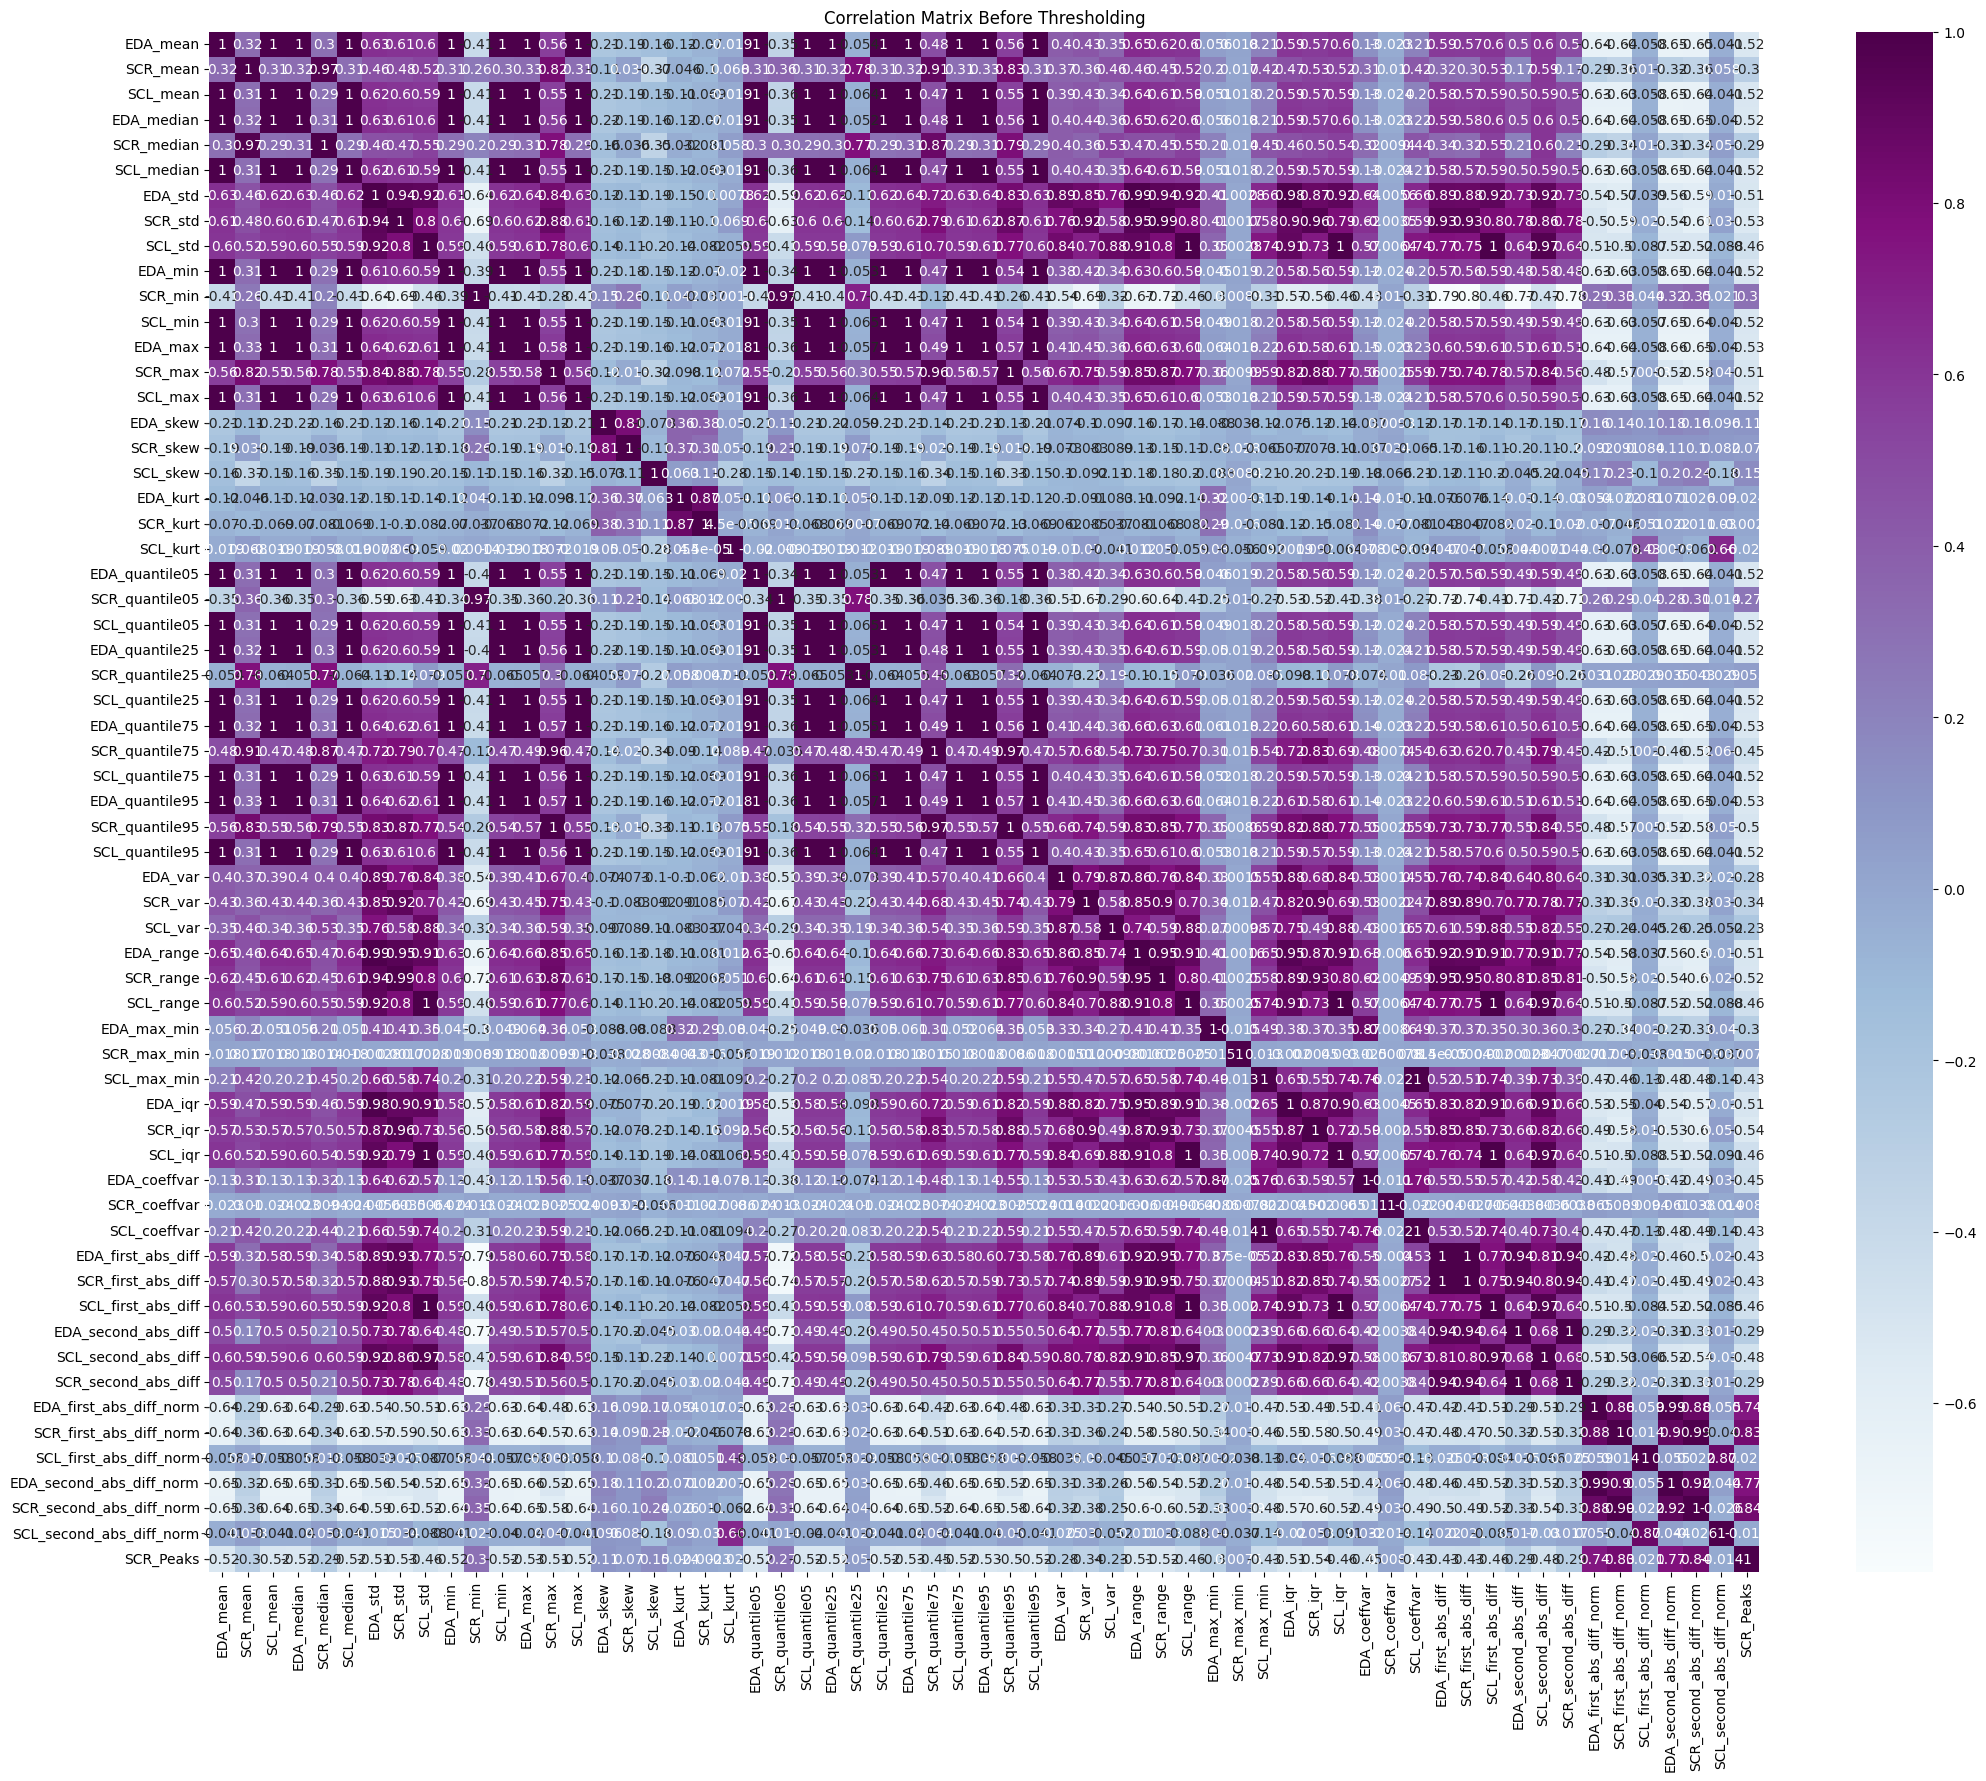

In [ ]:
plt.figure(figsize=(25, 20))
plt.title('Correlation Matrix Before Thresholding')
sns.heatmap(x.corr(), annot=True, cmap=plt.cm.BuPu);

#### MRMR Feature Selection Algorithm

In [ ]:
x_org

EDA_mean  SCR_mean  SCL_mean  EDA_median  SCR_median  SCL_median  \
0   0.432772 -0.000847  0.431730    0.432372   -0.001034    0.431794   
0   0.433012 -0.000167  0.431905    0.432372   -0.000362    0.431941   
0   0.433572  0.000457  0.431916    0.432372   -0.000009    0.431949   
0   0.435894  0.001573  0.433705    0.435574    0.001106    0.433760   
0   0.438616 -0.001008  0.439664    0.438136   -0.001382    0.439665   
..       ...       ...       ...         ...         ...         ...   
0   0.455218  0.000105  0.456643    0.454818   -0.000086    0.456568   
0   0.455378  0.001329  0.453586    0.454818    0.000911    0.453638   
0   0.451695  0.000543  0.449195    0.451615   -0.000188    0.449273   
0   0.455218  0.000105  0.456643    0.454818   -0.000086    0.456568   
0   0.451695  0.000543  0.449195    0.451615   -0.000188    0.449273   

     EDA_std   SCR_std   SCL_std   EDA_min  ...  EDA_second_abs_diff  \
0   0.002448  0.002261  0.000542  0.429168  ...             0.006039   
0   0.002309  0.002326  0.000354  0.430450  ...             0.005124   
0   0.003761  0.003746  0.000345  0.430450  ...             0.007686   
0   0.002196  0.002168  0.000301  0.433012  ...             0.005673   
0   0.002259  0.002212  0.000005  0.435574  ...             0.004758   
..       ...       ...       ...       ...  ...                  ...   
0   0.001678  0.001397  0.000531  0.452255  ...             0.003477   
0   0.001278  0.001256  0.000249  0.453537  ...             0.002745   
0   0.003537  0.003445  0.000622  0.445850  ...             0.005125   
0   0.001678  0.001397  0.000531  0.452255  ...             0.003477   
0   0.003537  0.003445  0.000622  0.445850  ...             0.005125   

    SCL_second_abs_diff  SCR_second_abs_diff  EDA_first_abs_diff_norm  \
0          5.875861e-06             0.006039                 1.430234   
0          3.286558e-06             0.005124                 1.257320   
0          3.154688e-06             0.007689                 1.135246   
0          4.699899e-06             0.005673                 1.400304   
0          6.102258e-07             0.004759                 1.172009   
..                  ...                  ...                      ...   
0          6.808934e-06             0.003480                 1.221781   
0          4.583211e-06             0.002747                 1.269148   
0          6.927118e-06             0.005125                 0.821062   
0          6.808934e-06             0.003480                 1.221781   
0          6.927118e-06             0.005125                 0.821062   

    SCR_first_abs_diff_norm  SCL_first_abs_diff_norm  \
0                  1.574791                 0.212379   
0                  1.263173                 0.211639   
0                  1.160028                 0.211834   
0                  1.426786                 0.211477   
0                  1.198858                 0.349590   
..                      ...                      ...   
0                  1.485668                 0.212701   
0                  1.295234                 0.211880   
0                  0.831858                 0.212040   
0                  1.485668                 0.212701   
0                  0.831858                 0.212040   

    EDA_second_abs_diff_norm  SCR_second_abs_diff_norm  \
0                   2.466768                  2.670642   
0                   2.218801                  2.203358   
0                   2.043436                  2.052284   
0                   2.583894                  2.616700   
0                   2.106333                  2.151465   
..                       ...                       ...   
0                   2.072639                  2.490230   
0                   2.147055                  2.187726   
0                   1.448968                  1.487558   
0                   2.072639                  2.490230   
0                   1.448968                  1.487558   

    SCL_second_abs_diff_nor

In [ ]:
selected_features_mrmr = mrmr_classif(X=x_org, y=y_org, K=11)
print('Best 11 features', selected_features_mrmr)


100%|██████████| 11/11 [00:01<00:00,  7.29it/s]

Best 11 features ['EDA_coeffvar', 'SCL_first_abs_diff_norm', 'SCR_coeffvar', 'SCR_quantile25', 'EDA_max_min', 'EDA_second_abs_diff', 'SCL_coeffvar', 'SCR_kurt', 'SCR_Peaks', 'SCR_second_abs_diff', 'SCL_max_min']


#### SelectKBest Feature Selection

In [ ]:
x_ = x_org.copy()
y_ = y_org.copy()

select = SelectKBest(score_func=f_regression, k=11)
z = select.fit_transform(x_,y_)
filter = select.get_support()
features = (x_.columns)
selected_features_kbest = features[filter]
print("After selecting best 11 features:", z.shape)
print("Selected 11 features:", selected_features_kbest)

After selecting best 11 features: (4850, 11)
Selected 11 features: Index(['SCR_min', 'SCR_quantile05', 'SCR_range', 'EDA_max_min', 'SCL_max_min',
       'EDA_coeffvar', 'SCL_coeffvar', 'EDA_first_abs_diff',
       'SCR_first_abs_diff', 'SCR_first_abs_diff_norm', 'SCR_Peaks'],
      dtype='object')


In [ ]:
#ortak_elemanlar = list(set(x_train.corr().columns) & set(selected_features_mrmr) & set(selected_features_kbest))
#farkli_elemanlar = list(set(x_train.corr().columns) ^ set(selected_features_mrmr) ^ set(selected_features_kbest))

ortak_elemanlar = list( set(selected_features_mrmr) & set(selected_features_kbest))
farkli_elemanlar = list(set(selected_features_mrmr) ^ set(selected_features_kbest))

print("Ortak Elemanlar:" , len(ortak_elemanlar) , ortak_elemanlar)
print("Farklı Elemanlar:", len(farkli_elemanlar), farkli_elemanlar)

Ortak Elemanlar: 5 ['EDA_coeffvar', 'SCL_coeffvar', 'SCL_max_min', 'SCR_Peaks', 'EDA_max_min']
Farklı Elemanlar: 12 ['SCR_first_abs_diff', 'SCR_coeffvar', 'SCR_kurt', 'SCR_range', 'SCL_first_abs_diff_norm', 'EDA_second_abs_diff', 'SCR_quantile05', 'SCR_first_abs_diff_norm', 'EDA_first_abs_diff', 'SCR_second_abs_diff', 'SCR_min', 'SCR_quantile25']


#### Filtered Features

In [ ]:
x=drop_columns(x,selected_features_mrmr)
x

EDA_coeffvar  SCL_first_abs_diff_norm  SCR_coeffvar  SCR_quantile25  \
0       0.005657                 0.212379     -2.668539       -0.002687   
0       0.005333                 0.211639    -13.933579       -0.002081   
0       0.008675                 0.211834      8.206424       -0.002262   
0       0.005037                 0.211477      1.378479       -0.000189   
0       0.005150                 0.349590     -2.194669       -0.002688   
..           ...                      ...           ...             ...   
0       0.003685                 0.212701     13.320071       -0.000919   
0       0.002808                 0.211880      0.944812        0.000685   
0       0.007830                 0.212040      6.344388       -0.001894   
0       0.003685                 0.212701     13.320071       -0.000919   
0       0.007830                 0.212040      6.344388       -0.001894   

    EDA_max_min  EDA_second_abs_diff  SCL_coeffvar  SCR_kurt  SCR_Peaks  \
0      1.017911             0.006039      0.001256 -1.071605          3   
0      1.014880             0.005124      0.000820 -1.171629          2   
0      1.032738             0.007686      0.000799 -0.270183          3   
0      1.014792             0.005673      0.000694 -1.258850          3   
0      1.017648             0.004758      0.000012 -0.835416          3   
..          ...                  ...           ...       ...        ...   
0      1.014165             0.003477      0.001163 -0.886792          4   
0      1.008473             0.002745      0.000550 -0.967670          3   
0      1.025861             0.005125      0.001385  0.185864          2   
0      1.014165             0.003477      0.001163 -0.886792          4   
0      1.025861             0.005125      0.001385  0.185864          2   

    SCR_second_abs_diff  SCL_max_min  
0              0.006039     1.004009  
0              0.005124     1.002606  
0              0.007689     1.002542  
0              0.005673     1.002203  
0              0.004759     1.000036  
..                  ...          ...  
0              0.003480     1.003716  
0              0.002747     1.001749  
0              0.005125     1.004417  
0              0.003480     1.003716  
0              0.005125     1.004417  

[4850 rows x 11 columns]

## Train Test Split

In [ ]:
#correlation_threshold(x,0.4)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print('x_train',x_train.shape)
print('y_train',y_test.shape)
print('Feature Count',len(x_train.count()))

evalSet = [(x_train, y_train), (x_test, y_test)]

x_train (3880, 11)
y_train (970,)
Feature Count 11


### Correlation Matrix


Feature Count 11


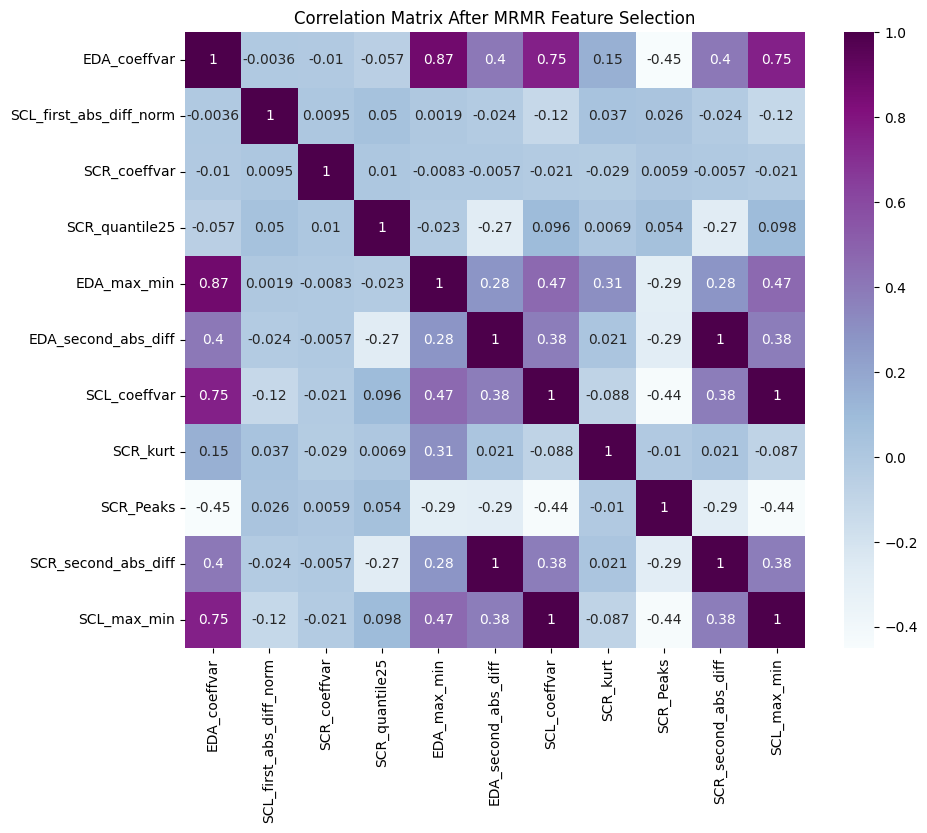

In [ ]:
print('Feature Count',len(x_train.count()))
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix After MRMR Feature Selection')
sns.heatmap(x_train.corr(), annot=True, cmap=plt.cm.BuPu);

## Dataset Shape

x train:  (3880, 11)
x test:  (970, 11)
y train:  (3880,)
y test:  (970,)


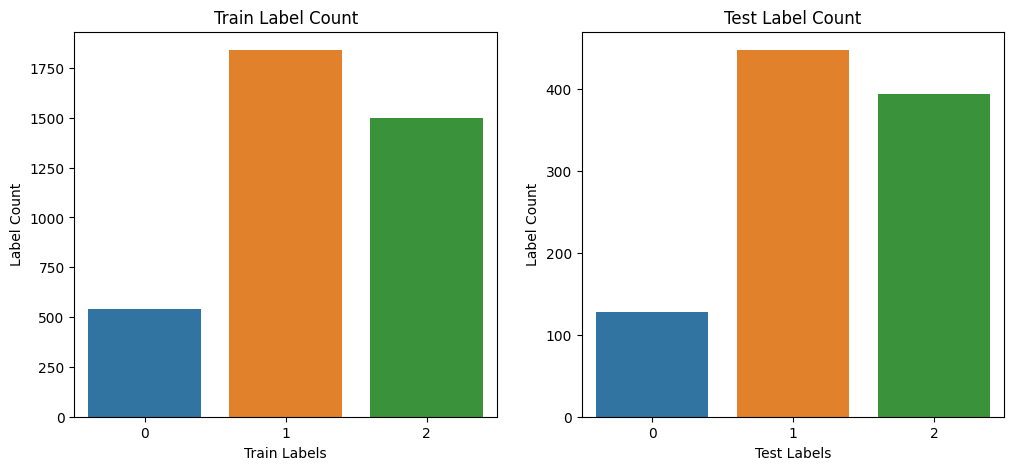

In [ ]:
y_train = y_train.T
y_test = y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

fig, ax = plt.subplots(1,2, figsize=(12,5))
for idx, group in enumerate([('Train', y_train), ('Test', y_test)]):
    data = group[1].value_counts()
    sns.barplot(ax=ax[idx], x=data.index, y=data.values)
    ax[idx].set_title(f'{group[0]} Label Count')
    ax[idx].set_xlabel(f'{group[0]} Labels')
    ax[idx].set_ylabel('Label Count')

plt.show()

## XGBClassifier

In [ ]:
allEda = XGBClassifier(objective = 'multi:softmax',
                              tree_method = 'hist',
                              learning_rate = 0.1,
                              n_estimators = 300,
                              # deterministic_histogram = 'false',
                              gradient_based = 0.1,
                              num_early_stopping_rounds = 20,
                              gamma = 3,
                              #seed = 35,
                              verbosity = 2)


model_allEda = allEda.fit(x_train,y_train,
                              eval_metric=['merror'],
                              eval_set = evalSet)

[0]	validation_0-merror:0.19716	validation_1-merror:0.20619
[1]	validation_0-merror:0.16289	validation_1-merror:0.17320
[2]	validation_0-merror:0.16237	validation_1-merror:0.17010
[3]	validation_0-merror:0.14201	validation_1-merror:0.15979
[4]	validation_0-merror:0.11289	validation_1-merror:0.12577
[5]	validation_0-merror:0.10876	validation_1-merror:0.12062
[6]	validation_0-merror:0.11108	validation_1-merror:0.12577
[7]	validation_0-merror:0.10103	validation_1-merror:0.11959
[8]	validation_0-merror:0.08479	validation_1-merror:0.10515
[9]	validation_0-merror:0.08943	validation_1-merror:0.11546
[10]	validation_0-merror:0.08814	validation_1-merror:0.11134
[11]	validation_0-merror:0.08557	validation_1-merror:0.11031
[12]	validation_0-merror:0.07990	validation_1-merror:0.10412
[13]	validation_0-merror:0.07861	validation_1-merror:0.10000
[14]	validation_0-merror:0.07216	validation_1-merror:0.09381
[15]	validation_0-merror:0.07320	validation_1-merror:0.09278
[16]	validation_0-merror:0.07062	v

### Training Confusion Matrix

Training Accuracy: 0.9531


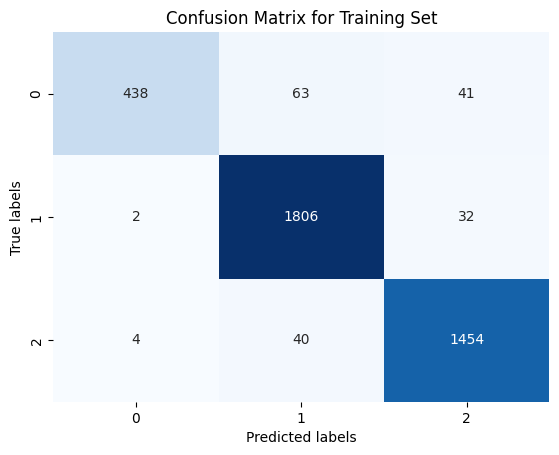

Confusion Matrix:
[[ 438   63   41]
 [   2 1806   32]
 [   4   40 1454]]

Accuracy: 0.9530927835051546


In [ ]:
train_predictions = allEda.predict(x_train)
train_accuracy = accuracy_score(y_train, train_predictions)

print("Training Accuracy: {:.4f}".format(train_accuracy))

# Create confusion matrix
cm = confusion_matrix(y_train, train_predictions)

# Display the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=set(y_train), yticklabels=set(y_train))


plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Training Set')
plt.show()
# Calculate accuracy
accuracy = accuracy_score(y_train, train_predictions)

print("Confusion Matrix:")
print(cm)
print("\nAccuracy:", accuracy)


### Model Prediction

In [ ]:
allEda_pred = allEda.predict(x_test)
allEda_report = (classification_report(y_test,
                                         allEda_pred,
                                         labels=np.unique(allEda_pred),
                                         digits=4))

print('----------------------------------------')
print('Balanced Accuracy: {0:.4f}'.format(balanced_accuracy_score(y_test, allEda_pred)))
print(allEda_report)

----------------------------------------
Balanced Accuracy: 0.8849
              precision    recall  f1-score   support

           0     0.9604    0.7578    0.8472       128
           1     0.9204    0.9554    0.9376       448
           2     0.9183    0.9416    0.9298       394

    accuracy                         0.9237       970
   macro avg     0.9330    0.8849    0.9049       970
weighted avg     0.9248    0.9237    0.9225       970



### Test Outcomes

#### Test Confusion Matrix

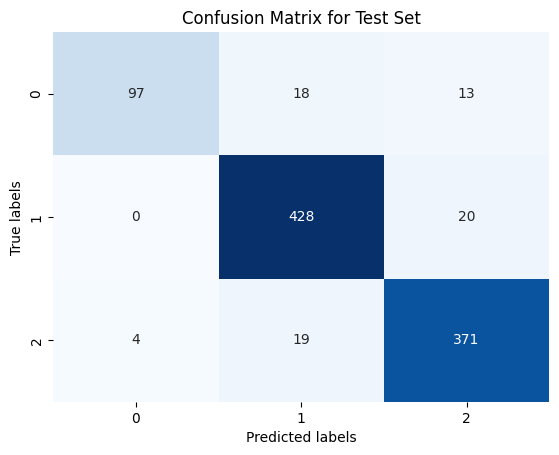

Confusion Matrix:
[[ 97  18  13]
 [  0 428  20]
 [  4  19 371]]

Accuracy: 0.9237113402061856


In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, allEda_pred)

# Display the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Test Set')

plt.show()
# Calculate accuracy
accuracy = accuracy_score(y_test, allEda_pred)

print("Confusion Matrix:")
print(cm)
print("\nAccuracy:", accuracy)

#### Test Roc Curve

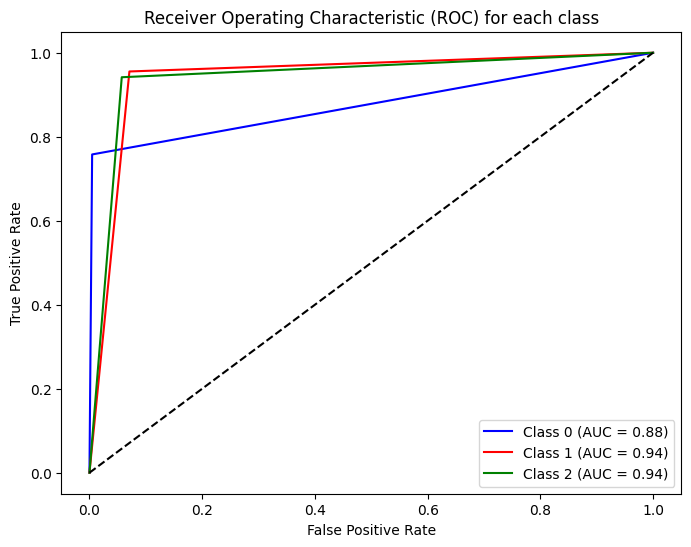

In [ ]:
def build_multiclass_roc(target_test, test_preds, num_classes):
    # Binarize the target and predictions
    target_test_bin = label_binarize(target_test, classes=range(num_classes))
    test_preds_bin = label_binarize(test_preds, classes=range(num_classes))

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(num_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(target_test_bin[:, i], test_preds_bin[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # Plot ROC curves for each class
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red', 'green', 'purple', 'orange']  # Add more colors if needed

    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], color=colors[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) for each class')
    plt.legend(loc='lower right')
    plt.savefig('roc_multiclass.png')

# Example usage
# Assuming num_classes is the number of classes in your problem
num_classes = 3  # Change this to the actual number of classes
build_multiclass_roc(y_test, allEda_pred, num_classes)


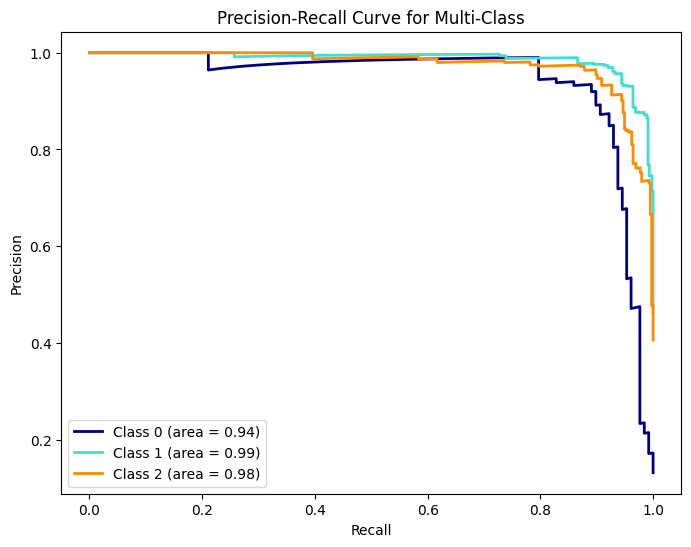

In [ ]:
# Make predictions on the test set
allEda_pred = allEda.predict_proba(x_test)

# Binarize the output (convert to binary format)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute Precision-Recall curve and area for each class
precision = dict()
recall = dict()

n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], allEda_pred[:, i])

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))

colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='Class {0} (area = {1:0.2f})'.format(i, auc(recall[i], precision[i])))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multi-Class')
plt.legend(loc='best')
plt.show()


In [ ]:
x.columns

Index(['EDA_coeffvar', 'SCL_first_abs_diff_norm', 'SCR_coeffvar',
       'SCR_quantile25', 'EDA_max_min', 'EDA_second_abs_diff', 'SCL_coeffvar',
       'SCR_kurt', 'SCR_Peaks', 'SCR_second_abs_diff', 'SCL_max_min'],
      dtype='object')

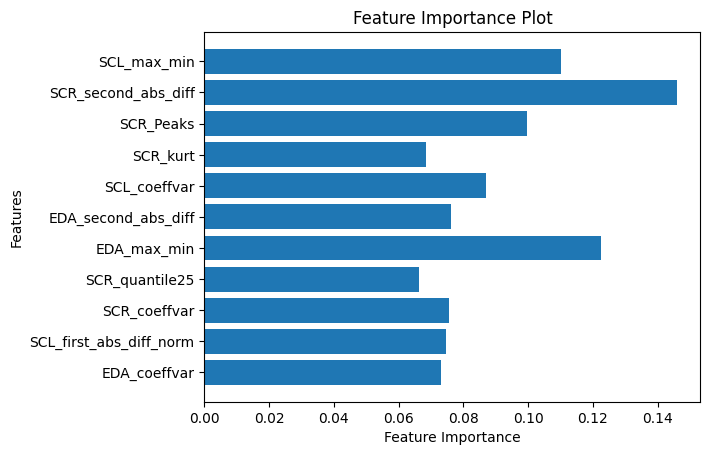

In [ ]:
# Feature Importance
feature_importance = allEda.feature_importances_
feature_names = x.columns
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()




# SHapley Additive ExPlanations

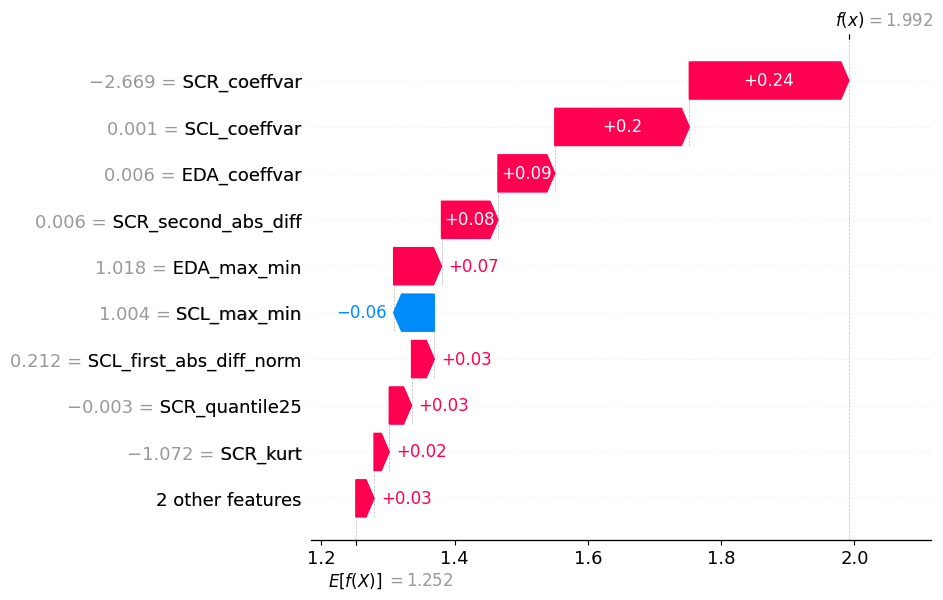

In [ ]:
# train an XGBoost model
model = xgboost.XGBRegressor().fit(x, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(x)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.initjs()
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [ ]:
shap.initjs()
# visualize all the training set predictions
shap.plots.force(shap_values[:500])

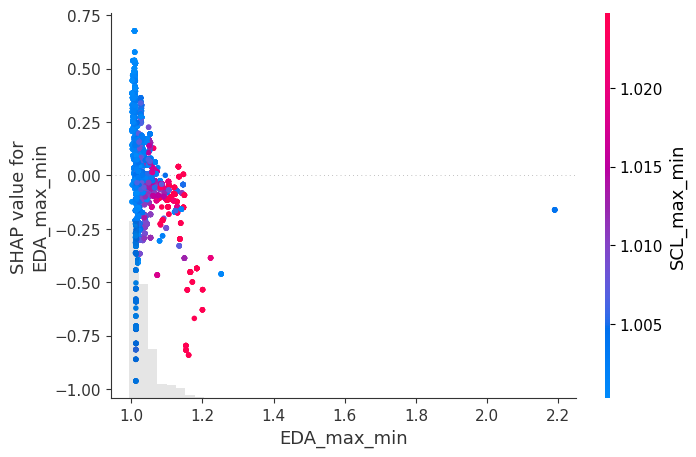

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "EDA_max_min"], color=shap_values)

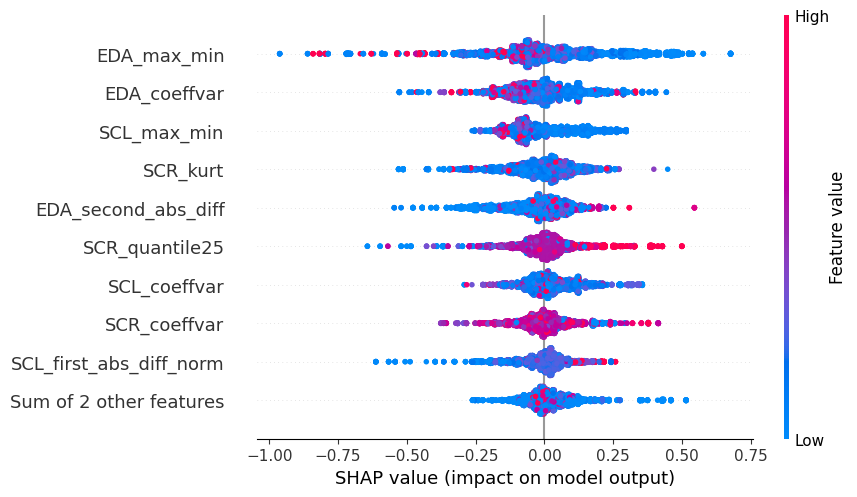

In [ ]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

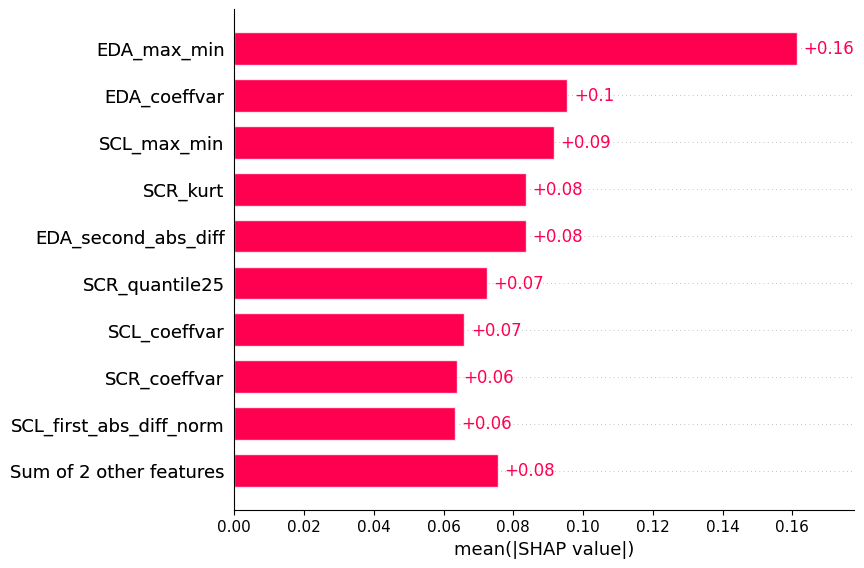

In [ ]:
shap.plots.bar(shap_values)

# Statistical Analysis

## ANOVA

In [ ]:
!pip install pingouin
import pingouin as pg

In [ ]:
type(Features_eda_all)
EDA_baseline_DF = Features_eda_all[(Features_eda_all['Label'] == 0)].copy()
EDA_stroop_DF   = Features_eda_all[(Features_eda_all['Label'] == 1)].copy()
EDA_nostress_DF = Features_eda_all[(Features_eda_all['Label'] == 2)].copy()

EDA_baseline_DF = EDA_baseline_DF.drop (['Label', 'Participant_Id'], axis=1).copy()
EDA_stroop_DF   = EDA_stroop_DF.drop   (['Label', 'Participant_Id'], axis=1).copy()
EDA_nostress_DF = EDA_nostress_DF.drop (['Label', 'Participant_Id'], axis=1).copy()

In [ ]:
import scipy.stats
F = []
P = []
for i in range(EDA_baseline_DF.shape[1]):
    fvalue, pvalue = scipy.stats.f_oneway(EDA_baseline_DF.iloc[:,i], EDA_stroop_DF.iloc[:,i], EDA_nostress_DF.iloc[:,i])
    F.append(fvalue)
    P.append(pvalue)

In [ ]:
F

[8.949319705522,
 16.938464139982894,
 9.00742603528933,
 8.986165762826538,
 16.66475351349945,
 9.002421109236526,
 36.5635891845727,
 47.192430073971416,
 30.209044859646816,
 9.382305273060291,
 39.51994313413389,
 9.095468811164995,
 8.606018493104056,
 31.104592238977293,
 8.939104990235522,
 2.9711206194180555,
 3.05531598176186,
 19.540278220516644,
 6.401049067049324,
 20.284647553623106,
 4.197016166501191,
 9.325979702492068,
 37.86284614478571,
 9.085430182658689,
 9.187022334187253,
 17.227567120818144,
 9.046603101510241,
 8.715497969529187,
 32.19339241966919,
 8.965536442693349,
 8.616942547561136,
 28.21428377689334,
 8.94350099449381,
 18.98279743758423,
 36.90827240324316,
 20.90942587795447,
 41.651958597809305,
 48.57272330685542,
 30.21035045805785,
 87.75248584910453,
 0.5420924364555166,
 78.15064000321969,
 30.82071221183695,
 41.886880875190414,
 29.86503375190835,
 143.22010187909726,
 15.37252169569792,
 79.24616434711176,
 57.885273296776525,
 55.2786152572

In [ ]:
P

[0.00013198311213236997,
 4.6698916378574566e-08,
 0.00012455932631303846,
 0.00012722583791207869,
 6.12857329729333e-08,
 0.00012518197982865748,
 1.7347241200578552e-16,
 5.030216438244875e-21,
 9.151107656256381e-14,
 8.574003015645307e-05,
 9.443749493441694e-18,
 0.00011409905190413975,
 0.00018581216062963084,
 3.779208251728713e-14,
 0.00013333318304889838,
 0.05133919081144968,
 0.047198570423979756,
 3.530154851441947e-09,
 0.0016738807200065927,
 1.6871464279394084e-09,
 0.015095083842114063,
 9.068834205579444e-05,
 4.8250692155974105e-17,
 0.00011524589490827511,
 0.00010415263414815993,
 3.5045302231153065e-08,
 0.0001197912251710138,
 0.00016660848300486847,
 1.2901389264223476e-14,
 0.00012986779303511694,
 0.00018380049428099035,
 6.568552760367391e-13,
 0.00013275048135275141,
 6.1375565304357824e-09,
 1.2352976324867288e-16,
 9.080329959936438e-10,
 1.1600393395728118e-18,
 1.2994130579803522e-21,
 9.1393146878362e-14,
 3.658758175538941e-38,
 0.581565416375653,
 3.9

# LSTM

In [ ]:
!pip install tensorflow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Example resizing (replace this with your actual resizing logic)
EDA_baseline_resized = EDA_baseline
EDA_stroop_resized = EDA_stroop
EDA_ns_resized = EDA_ns

# Concatenate along a new axis (axis=1 in this example)
concatenated_array = np.concatenate([EDA_baseline_resized, EDA_stroop_resized, EDA_ns_resized], axis=1)

# Create a DataFrame from the concatenated array
concatenated_df = pd.DataFrame(concatenated_array.reshape(-1, concatenated_array.shape[-1]))

# Resetting index after concatenation
concatenated_df.reset_index(drop=True, inplace=True)
eda_total_df = concatenated_df

eda_labels = concatenated_df[1].tolist()
eda_participants = concatenated_df[2].tolist()
eda_total_df = eda_total_df.drop(columns=[1, 2])


In [ ]:
# Fix random seed for reproducibility
tf.random.set_seed(7)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
eda_total_df_scaled = scaler.fit_transform(eda_total_df)
dataset=eda_total_df_scaled

In [ ]:
eda_total_df_scaled

array([[0.00791991],
       [0.00788593],
       [0.00791991],
       ...,
       [0.00757932],
       [0.00744335],
       [0.00747736]])

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

12060 5940


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
 dataX, dataY = [], []
 for i in range(len(dataset)-look_back-1):
  a = dataset[i:(i+look_back), 0]
  dataX.append(a)
  dataY.append(dataset[i + look_back, 0])
 return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
12058/12058 - 29s - loss: 0.0035 - 29s/epoch - 2ms/step
Epoch 2/100
12058/12058 - 26s - loss: 1.5163e-04 - 26s/epoch - 2ms/step
Epoch 3/100
12058/12058 - 25s - loss: 1.4711e-04 - 25s/epoch - 2ms/step
Epoch 4/100
12058/12058 - 27s - loss: 1.4105e-04 - 27s/epoch - 2ms/step
Epoch 5/100
12058/12058 - 25s - loss: 1.3946e-04 - 25s/epoch - 2ms/step
Epoch 6/100
12058/12058 - 26s - loss: 1.3860e-04 - 26s/epoch - 2ms/step
Epoch 7/100
12058/12058 - 26s - loss: 1.3502e-04 - 26s/epoch - 2ms/step
Epoch 8/100
12058/12058 - 28s - loss: 1.3167e-04 - 28s/epoch - 2ms/step
Epoch 9/100
12058/12058 - 27s - loss: 1.3415e-04 - 27s/epoch - 2ms/step
Epoch 10/100
12058/12058 - 25s - loss: 1.2916e-04 - 25s/epoch - 2ms/step
Epoch 11/100
12058/12058 - 28s - loss: 1.2970e-04 - 28s/epoch - 2ms/step
Epoch 12/100
12058/12058 - 30s - loss: 1.2635e-04 - 30s/epoch - 2ms/step
Epoch 13/100
12058/12058 - 29s - loss: 1.2732e-04 - 29s/epoch - 2ms/step
Epoch 14/100
12058/12058 - 28s - loss: 1.2727e-04 - 28s/epoch - 

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

186/186 [==============================] - 1s 3ms/step
Train Score: 0.40 RMSE
Test Score: 0.18 RMSE


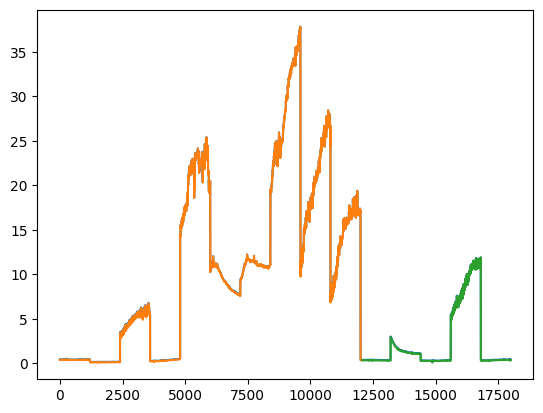

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

embedding_size=32
max_words=5000

model = Sequential()
model.add(Embedding(max_words, embedding_size, input_length=trainX.shape[1]))
model.add(LSTM(100))
model.add(Dense(3,activation='softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 32)             160000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 213503 (834.00 KB)
Trainable params: 213503 (834.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
eda_total_df_scaled


array([[0.00791991],
       [0.00788593],
       [0.00791991],
       ...,
       [0.00757932],
       [0.00744335],
       [0.00747736]])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# converting categorical variables in y_train to numerical variables
print('Shape of Label tensor: ', trainY.shape)
#train the model
model.fit(np.array(eda_total_df_scaled), np.array(eda_labels), epochs=5, batch_size=32)
#model.sav('MusicalInstrumentReviews.h5')

Shape of Label tensor:  (1, 12058)
Epoch 1/5


ValueError: ignored